# Problemin Tanımı

Kendiniz veya bir yakınınız, eğer araç piyasasına çok hâkim değilseniz, mutlaka şu soruyu aklınıza getirmişsinizdir: “Acaba bu araba ne kadar?” 
Özellikle ikinci el araç piyasasında, araç fiyatlarını pek çok farklı özelliğe dayanarak tahmin etmeye çalışıyoruz. Aracın kilometresi, motor gücü, markası, modeli gibi birçok özellik ve nitelik, fiyat üzerinde doğrudan etkili oluyor.

Bu nedenle, boyutlar, motor özellikleri ve daha fazlasını içeren kapsamlı bir veri kümesi kullanarak, farklı araç modellerinin fiyatlarını doğru bir şekilde tahmin edebilen bir makine öğrenimi modeli geliştirmeyi hedefliyoruz.

# Veri Seti Değişken Açıklamaları

Bu çalışma kapsamında kullanılan veri kümesi, ikinci el araç ilanlarından elde edilen teknik, fiziksel ve satışa yönelik özellikleri içermektedir. Her bir değişken, aracın fiyatını etkileyebilecek önemli bilgiler sunmaktadır.
- **URL**: İlanın yayımlandığı web sayfasının adresi.
- **İlan No**: Her ilan için benzersiz tanımlayıcı numara.
- **İlan Tarihi**: Aracın satış ilanının yayımlanma tarihi.
- **İl & İlçe**: Aracın satışa sunulduğu coğrafi konum bilgileri.
- **Fiyat**: Aracın ilan edilen satış fiyatı (hedef değişken).
- **Marka**: Aracın markası (ör. Toyota, BMW).
- **Seri**: Markaya bağlı alt seri (ör. Corolla, 3 Serisi).
- **Model**: Aracın spesifik modeli.
- **Yıl**: Aracın üretim yılı.
- **Kilometre**: Aracın kullanım sürecinde kat ettiği toplam mesafe.
- **Vites Tipi**: Aracın şanzıman tipi (manuel, otomatik vb.).
- **Yakıt Tipi**: Kullanılan yakıt türü (benzin, dizel, LPG vb.).
- **Kasa Tipi**: Araç gövde yapısı (sedan, hatchback, SUV vb.).
- **Renk**: Aracın dış renk bilgisi.
- **Motor Hacmi**: Motorun silindir hacmi (cm³).
- **Motor Gücü**: Motorun ürettiği güç (genellikle beygir gücü — HP).
- **Çekiş**: Aktarma sistemi türü (önden çekiş, arkadan itiş, dört çeker vb.).
- **Araç Durumu**: Aracın yeni, ikinci el veya hasarlı durumu.
- **Ort. Yakıt Tüketimi**: Aracın ortalama yakıt tüketimi (L/100 km).
- **Yakıt Deposu**: Yakıt deposunun kapasitesi.
- **Takasa Uygun**: İlan sahibinin takas kabul edip etmediği.
- **Kimden**: Aracın kim tarafından satıldığı (sahibinden, galeriden, bayiden vb.).


In [1]:
#FUTURE SELECTION - GEREKSIZ KOLONLARIN KALDIRILMASI
#Burada sezgisel olarak hareket ettik.
#URL, İlan No, İlçe, İl, Takasa Uygun --> Kaldırılacak Kolonlar
# Bu değişkenler araç fiyatında önemli bir etkiye sahip olmayacaktır.

#FUTURE EXTRACTION -- KOLON CIKARTIMI
#Yil adında bir kolonumuz var. Yil arabanin uretim yilini ifade eder.
#Buradan arabanin yasini cikartabiliriz.--> Daha sonra Yil Kolonunu cikarticaz.

#BOS VERI KONTORLU - BOS VERILERIN IMPUTATION YAPILMASI
#Bos verilerimizi kontrol ettik.
#Bos veri olan kolonlarimizi gerekli sekilde dolduracagiz. [1299 - 1300] , [2099 - 2100]

#Duplice kayitlarimi inceledik. Iki adet duplice kaydimiz bulunuyor.

#VERI STANDARTLASTIRMA -- HER KOLON KONRTROLE DILIP KOLON BAZINDA DA VERI TIPI DONUSUMU YAPILACAK.
#Kolon Basliklari herhangi bir sorun olmamasina karsin standartlastirilacak.
#-->Kolon basliklarini camel case veya snake case yapacagim.

#ENCODING
#Number Of Unique
#Her kolon icin kac adet unique degerimiz var buna bakacagiz.
#Ozellikle Obejct veri tipine sahip kolonlari inceledim.
#Burada encoding islemi uygulayacagiz.

#pd.DataFrame(df.dtypes, columns=["Veri Tipi"])
#Veri tipi donusumleri yapilacak. Encode edilmesi gerekn kolonlar encode edilip egitim icin butun kolonlar sayisal degere cevrilecek.

##VERI TEMIZLIGI
#BURADA VERILER ICINDE BIR STANDARTLASTIRMA YAPILACAK. Ornegim arac kilometresinde "km" cikarilacak.

#Marka --> nan degerlerimiz var. Mercedes - Benz, 'Rolls-Royce' gibi ifadeler var.
## Kasa tipinde "-" deger girilmis bunlari nan olarak degistirecegiz.
## Renk kisminda girinin uc farkli degerini goruyorum. bunlar degerlendiirlecek. Ayni zmanda diger kismi var. Belki bir sey yapialcabilir.
## Motor Hacmi aslinda numeric fakat degerler 2494 cc oalrak gorunuyor. '1601 - 1800 cm3' ayni zmanda bu sekilde degerle de var.
#Cekis kisminda nan degerler var ve "'-'" gelen degerler var.
#Takasa uygunlukta nan ve "-" gelen degerle var.
#Bunlar hepsi degistirelcek. incelenecek.
#1. once hangi kolonlarimizda "-" deger var bunu kontrol edecegiz.

#Veri seti dagilimi Dikili
#Marka' da bu sekilde gelen degerleri almamiz veri setinin yapsini bozacaktir. Dolayisiyla bunlari degerlendirecegiiz.
"""
Mini                 9
Alfa Romeo           7
Jaguar               6
Mazda                5
Tesla                5
Porsche              3
Arora                3
Tata                 3
Rover                2
Mitsubishi           2
Rolls-Royce          2
Maserati             2
Chrysler             1
Subaru               1
Suzuki               1
Anadol               1
DS Automobiles       1
Vanderhall           1
Cupra                1
"""
#Takasa uygunda 10 tane "-" deger var. Bunlarla bir nan olarak degsitirecegimiz soylemistik Daha sonrasinda encode yapabiliriz.

#Arac Durumu
"""
Amacimiz ikinci ela araclari degerlendirmek dolayisiyla
Sıfır                          3
Yurtdışından İthal Sıfır       1 i kaldirip bu kolonu tamamn kaladirabiliriz.
"""
#cekis kisiminda. 
#-                      2 --> Bunu nan olarak doldurup 
#AWD (Elektronik)       1 --> BUnu da kaldirabiliriz.




'\nAmacimiz ikinci ela araclari degerlendirmek dolayisiyla\nSıfır                          3\nYurtdışından İthal Sıfır       1 i kaldirip bu kolonu tamamn kaladirabiliriz.\n'

## Kutuphanelerin Yuklenmesi

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

from datetime import datetime

ModuleNotFoundError: No module named 'seaborn'

## Veri Setinin Iceriye Aktarilmasi

In [3]:
df_copy = pd.read_csv("test-carsresult.csv")

In [4]:
df = df_copy.copy()

In [5]:
df.head()

,URL,İlan No,İlan Tarihi,İlçe,İl,Fiyat,Marka,Seri,Model,Yıl,...,Kasa Tipi,Renk,Motor Hacmi,Motor Gücü,Çekiş,Araç Durumu,Ort. Yakıt Tüketimi,Yakıt Deposu,Takasa Uygun,Kimden
0,https://www.arabam.com/ilan/galeriden-satilik-...,35357261.0,30 Kasım 2025,Gaziemir,İzmir,514.950 TL,Seat,Ibiza,1.4 Style,2015.0,...,Hatchback/5,Beyaz,1390 cc,85 hp,Önden Çekiş,İkinci El,"5,9 lt",45 lt,Takasa Uygun Değil,Galeriden
1,https://www.arabam.com/ilan/galeriden-satilik-...,34275762.0,03 Aralık 2025,Torbalı,İzmir,280.000 TL,Renault,R 19,1.6 Europa RNE,1999.0,...,Sedan,Beyaz,1401 - 1600 cm3,76 - 100 HP,Önden Çekiş,İkinci El,NaN,NaN,Takasa Uygun,Galeriden
2,https://www.arabam.com/ilan/galeriden-satilik-...,33167936.0,02 Aralık 2025,Çiğli,İzmir,158.000 TL,Fiat,Uno,1.4 ie SX,1997.0,...,Hatchback/5,Bordo,1372 cc,71 hp,Önden Çekiş,İkinci El,NaN,42 lt,Takasa Uygun,Galeriden
3,https://www.arabam.com/ilan/galeriden-satilik-...,35376763.0,02 Aralık 2025,Buca,İzmir,819.000 TL,Dacia,Sandero,0.9 TCe Stepway Easy-R,2020.0,...,Hatchback/5,Gri,1200 cm3' e kadar,76 - 100 HP,Önden Çekiş,İkinci El,NaN,NaN,Takasa Uygun Değil,Galeriden
4,https://www.arabam.com/ilan/galeriden-satilik-...,34887281.0,02 Aralık 2025,Gaziemir,İzmir,495.000 TL,Renault,Clio,1.2 Authentique,2012.0,...,Hatchback/5,Gri,1200 cm3' e kadar,51 - 75 HP,Önden Çekiş,İkinci El,NaN,NaN,Takasa Uygun,Galeriden


## Veri Setinin Incelenmesi
##### Data Understanding

In [6]:
df.columns

Index(['URL', 'İlan No', 'İlan Tarihi', 'İlçe', 'İl', 'Fiyat', 'Marka', 'Seri',
       'Model', 'Yıl', 'Kilometre', 'Vites Tipi', 'Yakıt Tipi', 'Kasa Tipi',
       'Renk', 'Motor Hacmi', 'Motor Gücü', 'Çekiş', 'Araç Durumu',
       'Ort. Yakıt Tüketimi', 'Yakıt Deposu', 'Takasa Uygun', 'Kimden'],
      dtype='object')

In [7]:
df.shape

(2500, 23)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   URL                  2500 non-null   object 
 1   İlan No              2419 non-null   float64
 2   İlan Tarihi          2419 non-null   object 
 3   İlçe                 2419 non-null   object 
 4   İl                   2419 non-null   object 
 5   Fiyat                2500 non-null   object 
 6   Marka                2419 non-null   object 
 7   Seri                 2419 non-null   object 
 8   Model                2408 non-null   object 
 9   Yıl                  2419 non-null   float64
 10  Kilometre            2419 non-null   object 
 11  Vites Tipi           2419 non-null   object 
 12  Yakıt Tipi           2419 non-null   object 
 13  Kasa Tipi            2419 non-null   object 
 14  Renk                 2419 non-null   object 
 15  Motor Hacmi          2380 non-null   o

In [9]:
#URL, İlan No, İlçe, İl, Takasa Uygun --> Kaldırılacak Kolonlar
# Bu değişkenler araç fiyatında önemli bir etkiye sahip olmayacaktır.

In [10]:
# Veri setindeki her bir sütun için eksik (NaN) değerlerin sayısını hesaplar
df.isnull().sum()

URL                      0
İlan No                 81
İlan Tarihi             81
İlçe                    81
İl                      81
Fiyat                    0
Marka                   81
Seri                    81
Model                   92
Yıl                     81
Kilometre               81
Vites Tipi              81
Yakıt Tipi              81
Kasa Tipi               81
Renk                    81
Motor Hacmi            120
Motor Gücü             113
Çekiş                  109
Araç Durumu             81
Ort. Yakıt Tüketimi    830
Yakıt Deposu           739
Takasa Uygun           624
Kimden                  81
dtype: int64

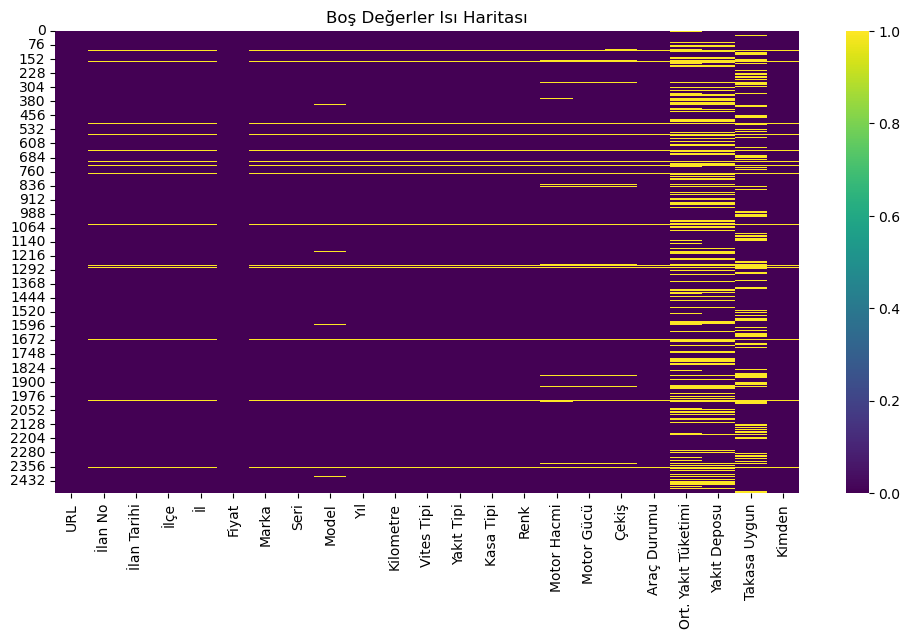

In [11]:
#seaborn - matplotlib ile veri gorsellestirme.

plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=True, cmap="viridis")
plt.title("Boş Değerler Isı Haritası")
plt.show()

In [12]:
df.duplicated().sum()

np.int64(2)

In [13]:
df[df.duplicated(keep=False)]
#Duplice kayitlarimi inceledik. Iki adet duplice kaydimiz bulunuyor.

,URL,İlan No,İlan Tarihi,İlçe,İl,Fiyat,Marka,Seri,Model,Yıl,...,Kasa Tipi,Renk,Motor Hacmi,Motor Gücü,Çekiş,Araç Durumu,Ort. Yakıt Tüketimi,Yakıt Deposu,Takasa Uygun,Kimden
1299,https://www.arabam.com/ilan/sahibinden-satilik...,27830740.0,29 Kasım 2025,Bornova,İzmir,670.000 TL,Peugeot,301,1.5 BlueHDI Active,2019.0,...,Sedan,Beyaz,1499 cc,102 hp,Önden Çekiş,İkinci El,"3,9 lt",50 lt,NaN,Sahibinden
1300,https://www.arabam.com/ilan/sahibinden-satilik...,27830740.0,29 Kasım 2025,Bornova,İzmir,670.000 TL,Peugeot,301,1.5 BlueHDI Active,2019.0,...,Sedan,Beyaz,1499 cc,102 hp,Önden Çekiş,İkinci El,"3,9 lt",50 lt,NaN,Sahibinden
2099,https://www.arabam.com/ilan/galeriden-satilik-...,33559959.0,27 Kasım 2025,Çiğli,İzmir,1.030.000 TL,Opel,Astra,1.4 T Sport Elegance,2019.0,...,Sedan,Siyah,1364 cc,140 hp,Önden Çekiş,İkinci El,"6,2 lt",56 lt,Takasa Uygun,Galeriden
2100,https://www.arabam.com/ilan/galeriden-satilik-...,33559959.0,27 Kasım 2025,Çiğli,İzmir,1.030.000 TL,Opel,Astra,1.4 T Sport Elegance,2019.0,...,Sedan,Siyah,1364 cc,140 hp,Önden Çekiş,İkinci El,"6,2 lt",56 lt,Takasa Uygun,Galeriden


In [14]:
df.describe()
#numeric degerler icin istatistiklarimie baktik.
#1975 - 2025 arasi model otomobillerin oldugunu farkettik. --> Yilda bir anormallik bulunmuyor. Eger sifir degeri gelseydi, bu degere ozellikle bakacaktik.

,İlan No,Yıl
count,2.419000e+03,2419.000000
mean,3.426996e+07,2012.798264
std,1.814004e+06,8.203561
min,1.496770e+07,1974.000000
25%,3.397533e+07,2008.000000
50%,3.515800e+07,2014.000000
75%,3.529196e+07,2019.000000
max,3.540485e+07,2025.000000


In [15]:
df.describe(include=["object"])

#Veri Tipi Object olan degerlrin istatistiklerine baktik.

,URL,İlan Tarihi,İlçe,İl,Fiyat,Marka,Seri,Model,Kilometre,Vites Tipi,...,Kasa Tipi,Renk,Motor Hacmi,Motor Gücü,Çekiş,Araç Durumu,Ort. Yakıt Tüketimi,Yakıt Deposu,Takasa Uygun,Kimden
count,2500,2419,2419,2419,2500,2419,2419,2408,2419,2419,...,2419,2419,2380,2387,2391,2419,1670,1761,1876,2419
unique,2498,31,32,3,900,40,220,980,923,3,...,11,23,132,141,5,3,78,41,3,3
top,https://www.arabam.com/ilan/sahibinden-satilik...,02 Aralık 2025,Gaziemir,İzmir,350.000 TL,Renault,Egea,1.3 Multijet Easy,230.000 km,Düz,...,Sedan,Beyaz,1401 - 1600 cm3,76 - 100 HP,Önden Çekiş,İkinci El,"4,2 lt",50 lt,Takasa Uygun,Galeriden
freq,2,367,645,2417,21,365,139,39,19,1226,...,1216,895,279,181,2029,2415,85,362,1401,1494


In [16]:
#Number Of Unique
#Her kolon icin kac adet unique degerimiz var buna bakacagiz.
#Ozellikle Obejct veri tipine sahip kolonlari inceledim.
#Burada encoding islemi uygulayacagiz.

In [17]:
num_unique = pd.DataFrame(df[
             [
             "İlçe", "İl", "Marka", "Seri", "Model", "Yıl", "Vites Tipi", "Yakıt Tipi", 
             "Kasa Tipi", "Renk", "Motor Hacmi", "Çekiş", "Araç Durumu", "Takasa Uygun", "Kimden"
]
].nunique(), columns=["Number Of Unique"]).sort_values(by = "Number Of Unique", ascending=False)

In [18]:
num_unique

,Number Of Unique
Model,980
Seri,220
Motor Hacmi,132
Yıl,44
Marka,40
İlçe,32
Renk,23
Kasa Tipi,11
Yakıt Tipi,5
Çekiş,5


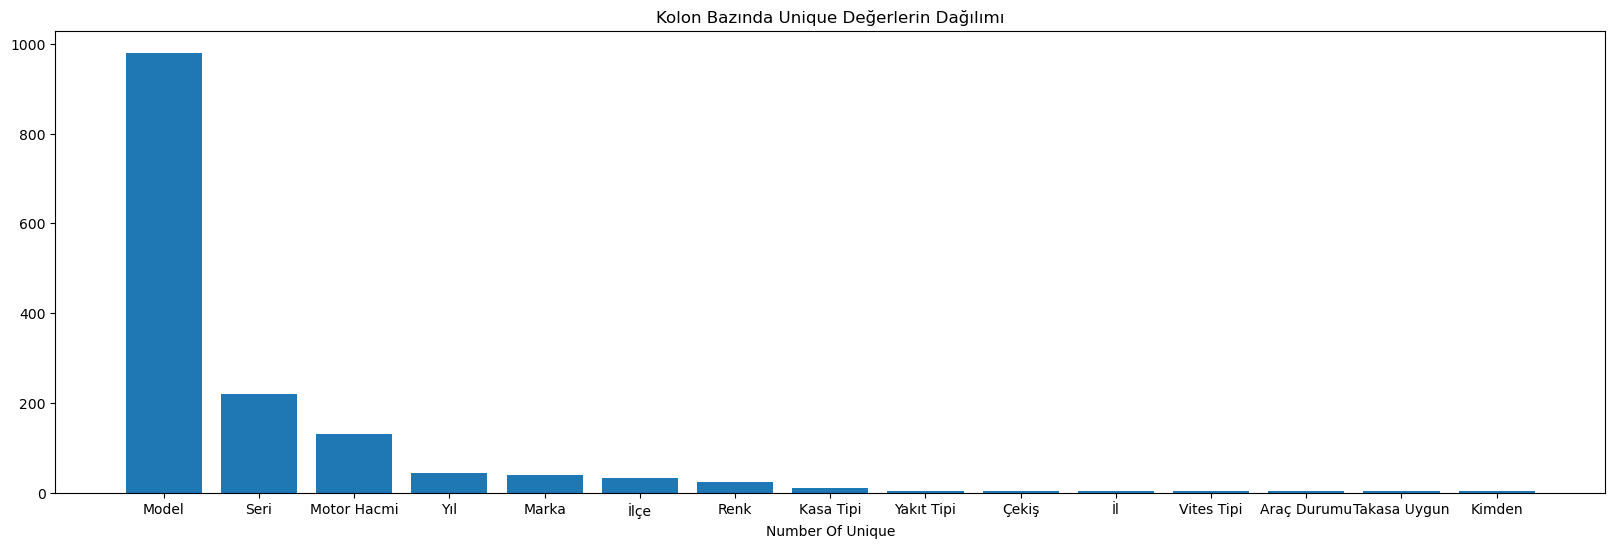

In [19]:
#Bunlari daha net gorebilmek icin grafik uzerinde bakacagim.
#Burada veri gorsellestirme icin matplotlib ve seaborn kullancagim.

plt.figure(figsize=(20, 6))

plt.bar(num_unique.index, num_unique["Number Of Unique"])
plt.xlabel("Number Of Unique")
plt.title("Kolon Bazında Unique Değerlerin Dağılımı")
plt.show()

In [20]:
pd.DataFrame(df.dtypes, columns=["Veri Tipi"])

#Veri tipi donusumleri yapilacak. Encode edilmesi gerekn kolonlar encode edilip egitim icin butun kolonlar sayisal degere cevrilecek.

,Veri Tipi
URL,object
İlan No,float64
İlan Tarihi,object
İlçe,object
İl,object
Fiyat,object
Marka,object
Seri,object
Model,object
Yıl,float64


In [21]:
df.columns

Index(['URL', 'İlan No', 'İlan Tarihi', 'İlçe', 'İl', 'Fiyat', 'Marka', 'Seri',
       'Model', 'Yıl', 'Kilometre', 'Vites Tipi', 'Yakıt Tipi', 'Kasa Tipi',
       'Renk', 'Motor Hacmi', 'Motor Gücü', 'Çekiş', 'Araç Durumu',
       'Ort. Yakıt Tüketimi', 'Yakıt Deposu', 'Takasa Uygun', 'Kimden'],
      dtype='object')

In [22]:
cols = [
             "İlçe", "İl", "Marka", "Seri", "Model", "Yıl", "Vites Tipi", "Yakıt Tipi", 
             "Kasa Tipi", "Renk", "Motor Hacmi", "Çekiş", "Araç Durumu", "Takasa Uygun", "Kimden"
]

for col in cols:
    print(f"{col}")
    print(df[col].unique())
    print("-" * 40)
    print("\n")

İlçe
['Gaziemir' 'Torbalı' 'Çiğli' 'Buca' 'Karabağlar' 'Menderes' 'Konak'
 'Bergama' 'Bornova' 'Kemalpaşa' 'Ödemiş' 'Karşıyaka' 'Tire' 'Bayraklı'
 'Balçova' nan 'Seferihisar' 'Urla' 'Menemen' 'Aliağa' 'Narlıdere' 'Çeşme'
 'Dikili' 'Foça' 'Kiraz' 'Güzelbahçe' 'Kınık' 'Bayındır' 'Selçuk'
 'Kayapınar' 'Beydağ' 'Edremit' 'Karaburun']
----------------------------------------


İl
['İzmir' nan 'Diyarbakır' 'Balıkesir']
----------------------------------------


Marka
['Seat' 'Renault' 'Fiat' 'Dacia' 'Peugeot' 'Opel' 'Ford' 'Volkswagen'
 'Toyota' 'Hyundai' 'Citroen' 'BMW' 'Mercedes - Benz' 'Volvo' 'Nissan' nan
 'Mazda' 'Tofaş' 'Audi' 'Skoda' 'Honda' 'Chevrolet' 'Jaguar' 'Kia'
 'Porsche' 'Mini' 'Arora' 'Alfa Romeo' 'Tesla' 'Mitsubishi' 'Vanderhall'
 'Suzuki' 'Rolls-Royce' 'DS Automobiles' 'Tata' 'Maserati' 'Anadol'
 'Rover' 'Subaru' 'Chrysler' 'Cupra']
----------------------------------------


Seri
['Ibiza' 'R 19' 'Uno' 'Sandero' 'Clio' 'Leon' '208' 'Megane' 'Astra'
 'Focus' 'Linea' 'Toledo' 

In [23]:
#Marka --> nan degerlerimiz var. Mercedes - Benz, 'Rolls-Royce' gibi ifadeler var.
## Kasa tipinde "-" deger girilmis bunlari nan olarak degistirecegiz.
## Renk kisminda girinin uc farkli degerini goruyorum. bunlar degerlendiirlecek. Ayni zmanda diger kismi var. Belki bir sey yapialcabilir.
## Motor Hacmi aslinda numeric fakat degerler 2494 cc oalrak gorunuyor. '1601 - 1800 cm3' ayni zmanda bu sekilde degerle de var.
#Cekis kisminda nan degerler var ve "'-'" gelen degerler var.
#Takasa uygunlukta nan ve "-" gelen degerle var.
#Bunlar hepsi degistirelcek. incelenecek.

#1. once hangi kolonlarimizda "-" deger var bunu kontrol edecegiz.

In [24]:
#Veri setimiz dengeli mi degil mi? Balance - Imbalanced
cols = [
             "İlçe", "İl", "Marka", "Seri", "Model", "Yıl", "Vites Tipi", "Yakıt Tipi", 
             "Kasa Tipi", "Renk", "Motor Hacmi", "Çekiş", "Araç Durumu", "Takasa Uygun", "Kimden"
]

for col in cols:
    print(f"{col}")
    print(df[col].value_counts())
    print("-" * 40)
    print("\n")

İlçe
İlçe
Gaziemir       645
Buca           458
Bornova        257
Konak          133
Bayraklı       111
Karabağlar     106
Menemen         94
Karşıyaka       81
Torbalı         80
Çiğli           70
Ödemiş          55
Menderes        54
Tire            50
Bergama         39
Urla            35
Kemalpaşa       26
Aliağa          25
Seferihisar     20
Balçova         18
Dikili           9
Foça             9
Kiraz            9
Narlıdere        8
Bayındır         8
Çeşme            6
Güzelbahçe       5
Kınık            2
Selçuk           2
Kayapınar        1
Beydağ           1
Edremit          1
Karaburun        1
Name: count, dtype: int64
----------------------------------------


İl
İl
İzmir         2417
Diyarbakır       1
Balıkesir        1
Name: count, dtype: int64
----------------------------------------


Marka
Marka
Renault            365
Fiat               275
Volkswagen         245
Opel               199
Ford               166
BMW                154
Mercedes - Benz    139
Hyundai 

In [25]:
#Veri seti dagilimi
#Marka' da bu sekilde gelen degerleri almamiz veri setinin yapsini bozacaktir. Dolayisiyla bunlari degerlendirecegiiz.
"""
Mini                 9
Alfa Romeo           7
Jaguar               6
Mazda                5
Tesla                5
Porsche              3
Arora                3
Tata                 3
Rover                2
Mitsubishi           2
Rolls-Royce          2
Maserati             2
Chrysler             1
Subaru               1
Suzuki               1
Anadol               1
DS Automobiles       1
Vanderhall           1
Cupra                1
"""
#Takasa uygunda 10 tane "-" deger var. Bunlarla bir nan olarak degsitirecegimiz soylemistik Daha sonrasinda encode yapabiliriz.

#Arac Durumu
"""
Amacimiz ikinci ela araclari degerlendirmek dolayisiyla
Sıfır                          3
Yurtdışından İthal Sıfır       1 i kaldirip bu kolonu tamamn kaladirabiliriz.
"""
#cekis kisiminda. 
#-                      2 --> Bunu nan olarak doldurup 
#AWD (Elektronik)       1 --> BUnu da kaldirabiliriz.

'\nAmacimiz ikinci ela araclari degerlendirmek dolayisiyla\nSıfır                          3\nYurtdışından İthal Sıfır       1 i kaldirip bu kolonu tamamn kaladirabiliriz.\n'

In [26]:
#FUTURE SELECTION - GEREKSIZ KOLONLARIN KALDIRILMASI
#Burada sezgisel olarak hareket ettik.
#URL, İlan No, İlçe, İl, Takasa Uygun --> Kaldırılacak Kolonlar
# Bu değişkenler araç fiyatında önemli bir etkiye sahip olmayacaktır.

In [27]:
df.columns

Index(['URL', 'İlan No', 'İlan Tarihi', 'İlçe', 'İl', 'Fiyat', 'Marka', 'Seri',
       'Model', 'Yıl', 'Kilometre', 'Vites Tipi', 'Yakıt Tipi', 'Kasa Tipi',
       'Renk', 'Motor Hacmi', 'Motor Gücü', 'Çekiş', 'Araç Durumu',
       'Ort. Yakıt Tüketimi', 'Yakıt Deposu', 'Takasa Uygun', 'Kimden'],
      dtype='object')

# Ozellik Mushendisligi - Feature Engineering

In [28]:
#Bu kolonlar bizim fiyat tahminimizi etkilemeyeceği için bunları kaldırıyoruz.

df = df.drop(columns = ["URL", "İlan No", "İlan Tarihi", "İl", "İlçe", "Takasa Uygun"], axis=1)

In [29]:
df.head()

,Fiyat,Marka,Seri,Model,Yıl,Kilometre,Vites Tipi,Yakıt Tipi,Kasa Tipi,Renk,Motor Hacmi,Motor Gücü,Çekiş,Araç Durumu,Ort. Yakıt Tüketimi,Yakıt Deposu,Kimden
0,514.950 TL,Seat,Ibiza,1.4 Style,2015.0,177.000 km,Düz,Benzin,Hatchback/5,Beyaz,1390 cc,85 hp,Önden Çekiş,İkinci El,"5,9 lt",45 lt,Galeriden
1,280.000 TL,Renault,R 19,1.6 Europa RNE,1999.0,290.000 km,Düz,LPG & Benzin,Sedan,Beyaz,1401 - 1600 cm3,76 - 100 HP,Önden Çekiş,İkinci El,NaN,NaN,Galeriden
2,158.000 TL,Fiat,Uno,1.4 ie SX,1997.0,420.000 km,Düz,LPG & Benzin,Hatchback/5,Bordo,1372 cc,71 hp,Önden Çekiş,İkinci El,NaN,42 lt,Galeriden
3,819.000 TL,Dacia,Sandero,0.9 TCe Stepway Easy-R,2020.0,130.000 km,Otomatik,Benzin,Hatchback/5,Gri,1200 cm3' e kadar,76 - 100 HP,Önden Çekiş,İkinci El,NaN,NaN,Galeriden
4,495.000 TL,Renault,Clio,1.2 Authentique,2012.0,227.000 km,Düz,LPG & Benzin,Hatchback/5,Gri,1200 cm3' e kadar,51 - 75 HP,Önden Çekiş,İkinci El,NaN,NaN,Galeriden


In [30]:
#FUTURE EXTRACTION -- KOLON CIKARTIMI
#Yil adında bir kolonumuz var. Yil arabanin uretim yilini ifade eder.
#Buradan arabanin yasini cikartabiliriz.--> Daha sonra Yil Kolonunu cikarticaz.

In [31]:
current_year = datetime.now().year
df["arac_yasi"] = current_year - df["Yıl"]

#arac_yasi kolonunda eksik degerler oldugu icin int cevrilemez.
#df["arac_yasi"].astype(int)

In [32]:
df.head()

,Fiyat,Marka,Seri,Model,Yıl,Kilometre,Vites Tipi,Yakıt Tipi,Kasa Tipi,Renk,Motor Hacmi,Motor Gücü,Çekiş,Araç Durumu,Ort. Yakıt Tüketimi,Yakıt Deposu,Kimden,arac_yasi
0,514.950 TL,Seat,Ibiza,1.4 Style,2015.0,177.000 km,Düz,Benzin,Hatchback/5,Beyaz,1390 cc,85 hp,Önden Çekiş,İkinci El,"5,9 lt",45 lt,Galeriden,10.0
1,280.000 TL,Renault,R 19,1.6 Europa RNE,1999.0,290.000 km,Düz,LPG & Benzin,Sedan,Beyaz,1401 - 1600 cm3,76 - 100 HP,Önden Çekiş,İkinci El,NaN,NaN,Galeriden,26.0
2,158.000 TL,Fiat,Uno,1.4 ie SX,1997.0,420.000 km,Düz,LPG & Benzin,Hatchback/5,Bordo,1372 cc,71 hp,Önden Çekiş,İkinci El,NaN,42 lt,Galeriden,28.0
3,819.000 TL,Dacia,Sandero,0.9 TCe Stepway Easy-R,2020.0,130.000 km,Otomatik,Benzin,Hatchback/5,Gri,1200 cm3' e kadar,76 - 100 HP,Önden Çekiş,İkinci El,NaN,NaN,Galeriden,5.0
4,495.000 TL,Renault,Clio,1.2 Authentique,2012.0,227.000 km,Düz,LPG & Benzin,Hatchback/5,Gri,1200 cm3' e kadar,51 - 75 HP,Önden Çekiş,İkinci El,NaN,NaN,Galeriden,13.0


In [33]:
#Daha sonra artik yil kolonu ile isimiz kalmadi. simdi bunu kaldiracagim.

df = df.drop("Yıl", axis = 1)

In [34]:
#Duplice kayitlarimi inceledik. Iki adet duplice kaydimiz bulunuyor.
df.duplicated().sum()

np.int64(16)

In [35]:
df[df.duplicated(keep=False)]

,Fiyat,Marka,Seri,Model,Kilometre,Vites Tipi,Yakıt Tipi,Kasa Tipi,Renk,Motor Hacmi,Motor Gücü,Çekiş,Araç Durumu,Ort. Yakıt Tüketimi,Yakıt Deposu,Kimden,arac_yasi
105,450.000 TL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
154,1.430.000 TL,Citroen,C3,1.2 PureTech Shine,12.000 km,Otomatik,Benzin,Hatchback/5,Beyaz,1199 cc,112 hp,Önden Çekiş,İkinci El,"4,8 lt",47 lt,Sahibinden,1.0
155,1.430.000 TL,Citroen,C3,1.2 PureTech Shine,12.000 km,Otomatik,Benzin,Hatchback/5,Beyaz,1199 cc,112 hp,Önden Çekiş,İkinci El,"4,8 lt",47 lt,Sahibinden,1.0
173,844.444 TL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
174,844.444 TL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
328,669.500 TL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
506,225.000 TL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
559,1.160.000 TL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
613,1.360.000 TL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
680,1.250.000 TL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
df = df.drop_duplicates(keep="first")

In [37]:
df.duplicated().sum()

np.int64(0)

In [38]:
#Fiyat haricindeki diger butun kolonlarin nan oldugunu fark ettim.
#Bu kolonlarla calsimam cok mantikli olmayacak. Bunun icin bunlarin hepsini kaldiracagim.
#ignore_index = True yapmadim. index numarali ile silecegim.
df_NaN = df[df.drop(columns=["Fiyat"]).isna().all(axis=1)]
NaN_index = df_NaN.index

In [39]:
df_NaN.head()

,Fiyat,Marka,Seri,Model,Kilometre,Vites Tipi,Yakıt Tipi,Kasa Tipi,Renk,Motor Hacmi,Motor Gücü,Çekiş,Araç Durumu,Ort. Yakıt Tüketimi,Yakıt Deposu,Kimden,arac_yasi
63,1.195.000 TL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
105,450.000 TL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
108,350.000 TL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
164,555.000 TL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
173,844.444 TL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
df = df.drop(index=NaN_index, axis=0)

In [41]:
#Simdi tekrar kontrol ettigimde bunlarin olmadigi konusunda hemfikir olduk.
df[df.drop(columns=["Fiyat"]).isna().all(axis=1)]

,Fiyat,Marka,Seri,Model,Kilometre,Vites Tipi,Yakıt Tipi,Kasa Tipi,Renk,Motor Hacmi,Motor Gücü,Çekiş,Araç Durumu,Ort. Yakıt Tüketimi,Yakıt Deposu,Kimden,arac_yasi


In [42]:
#Kolon Basliklari herhangi bir sorun olmamasina karsin standartlastirilacak.
#-->Kolon basliklarini camel case veya snake case yapacagim.

In [43]:
df.columns

Index(['Fiyat', 'Marka', 'Seri', 'Model', 'Kilometre', 'Vites Tipi',
       'Yakıt Tipi', 'Kasa Tipi', 'Renk', 'Motor Hacmi', 'Motor Gücü', 'Çekiş',
       'Araç Durumu', 'Ort. Yakıt Tüketimi', 'Yakıt Deposu', 'Kimden',
       'arac_yasi'],
      dtype='object')

In [44]:
columns = [
    "fiyat", "marka", "seri", "model", "kilometre", "vites_tipi", "yakit_tipi", "kasa_tipi", "renk",
    "motor_hacmi", "motor_gucu", "cekis", "arac_durumu", "ort_yakit_tuketimi", "yakit_deposu", "kimden", "arac_yasi"
]

In [45]:
df.columns = columns

In [46]:
#eveet simdi kolon basliklarimiz daha duzgun duruyor.
#Burada simdi head calistiralim. Bakalim nasil gelmis?
#Kolon basliklarini snake case yaptim.
df.columns

Index(['fiyat', 'marka', 'seri', 'model', 'kilometre', 'vites_tipi',
       'yakit_tipi', 'kasa_tipi', 'renk', 'motor_hacmi', 'motor_gucu', 'cekis',
       'arac_durumu', 'ort_yakit_tuketimi', 'yakit_deposu', 'kimden',
       'arac_yasi'],
      dtype='object')

In [47]:
df.head()

,fiyat,marka,seri,model,kilometre,vites_tipi,yakit_tipi,kasa_tipi,renk,motor_hacmi,motor_gucu,cekis,arac_durumu,ort_yakit_tuketimi,yakit_deposu,kimden,arac_yasi
0,514.950 TL,Seat,Ibiza,1.4 Style,177.000 km,Düz,Benzin,Hatchback/5,Beyaz,1390 cc,85 hp,Önden Çekiş,İkinci El,"5,9 lt",45 lt,Galeriden,10.0
1,280.000 TL,Renault,R 19,1.6 Europa RNE,290.000 km,Düz,LPG & Benzin,Sedan,Beyaz,1401 - 1600 cm3,76 - 100 HP,Önden Çekiş,İkinci El,NaN,NaN,Galeriden,26.0
2,158.000 TL,Fiat,Uno,1.4 ie SX,420.000 km,Düz,LPG & Benzin,Hatchback/5,Bordo,1372 cc,71 hp,Önden Çekiş,İkinci El,NaN,42 lt,Galeriden,28.0
3,819.000 TL,Dacia,Sandero,0.9 TCe Stepway Easy-R,130.000 km,Otomatik,Benzin,Hatchback/5,Gri,1200 cm3' e kadar,76 - 100 HP,Önden Çekiş,İkinci El,NaN,NaN,Galeriden,5.0
4,495.000 TL,Renault,Clio,1.2 Authentique,227.000 km,Düz,LPG & Benzin,Hatchback/5,Gri,1200 cm3' e kadar,51 - 75 HP,Önden Çekiş,İkinci El,NaN,NaN,Galeriden,13.0


In [48]:
#once hangi kolonlarimizda "-" deger var bunu kontrol edecegiz.
#Yukarida veri incelemesi yaparken "-" degerlein oldugunu gormsutuk.
#Butun kolonlarimda bu var mi bunu kontrole decegim. Daha sonra bunlari NaN yapacagim.
df[(df == "nan").any(axis=1)] #string olarak gelmis nan yok.

,fiyat,marka,seri,model,kilometre,vites_tipi,yakit_tipi,kasa_tipi,renk,motor_hacmi,motor_gucu,cekis,arac_durumu,ort_yakit_tuketimi,yakit_deposu,kimden,arac_yasi


In [49]:
#"-" olarak gelmis degerler var. Bunlar aslindan nan. Bunlari np.nan olark degistirecegim.
#Asagida da tam olarka nerelerde var bunu gorduk.
df[(df == "-").any(axis=1)]

,fiyat,marka,seri,model,kilometre,vites_tipi,yakit_tipi,kasa_tipi,renk,motor_hacmi,motor_gucu,cekis,arac_durumu,ort_yakit_tuketimi,yakit_deposu,kimden,arac_yasi
206,2.465.000 TL,BMW,4 Serisi,420d M Sport,198.000 km,Otomatik,Dizel,-,Beyaz,1995 cc,184 hp,Arkadan İtiş,İkinci El,"4,8 lt",57 lt,Galeriden,11.0
285,1.100.000 TL,Audi,A3,A3 Sportback 1.4 TFSI,160.000 km,Otomatik,Benzin,Hatchback/5,Beyaz,1201 - 1400 cm3,-,-,İkinci El,NaN,NaN,Sahibinden,14.0
337,26.750.000 TL,Porsche,911,Targa 4 GTS,6.100 km,Otomatik,Benzin,-,Mavi,3800 cc,430 hp,4WD (Sürekli),İkinci El,"9,2 lt",68 lt,Galeriden,3.0
397,269.000 TL,Arora,S1,NaN,0 km,Otomatik,Elektrik,Coupe,Siyah,-,50 HP'ye kadar,Arkadan İtiş,Sıfır,NaN,NaN,Galeriden,0.0
406,4.274.000 TL,BMW,i Serisi,i5 eDrive30 M Sport,49.000 km,Otomatik,Elektrik,Sedan,Gri,-,201 - 225 HP,Arkadan İtiş,İkinci El,NaN,NaN,Galeriden,1.0
433,4.140.000 TL,BMW,i Serisi,i4 eDrive40 M Sport,12.000 km,Otomatik,Elektrik,Hatchback/5,Siyah,-,326 - 350 HP,Arkadan İtiş,İkinci El,NaN,NaN,Galeriden,1.0
468,4.179.000 TL,BMW,i Serisi,i5 eDrive30 M Sport,32.000 km,Otomatik,Elektrik,Sedan,Siyah,-,201 - 225 HP,Arkadan İtiş,İkinci El,NaN,NaN,Galeriden,1.0
469,4.490.000 TL,BMW,i Serisi,i5 eDrive30 M Sport,40.000 km,Otomatik,Elektrik,Sedan,Siyah,-,201 - 225 HP,Arkadan İtiş,İkinci El,NaN,NaN,Galeriden,1.0
756,2.500.000 TL,Mercedes - Benz,E,250 AMG,105.000 km,Otomatik,Benzin,-,Beyaz,1991 cc,211 hp,Arkadan İtiş,İkinci El,"6,3 lt",66 lt,Galeriden,11.0
1193,1.170.000 TL,Renault,Zoe,NaN,42.803 km,Otomatik,Elektrik,Hatchback/5,Gri,-,101 - 125 HP,Önden Çekiş,İkinci El,NaN,NaN,Galeriden,3.0


In [50]:
#"-" olarak gecen degerin hangi kolonda ne kadar var bunu gorduk.
(df == "-").sum().sort_values(ascending=False)

motor_hacmi           22
kasa_tipi              6
motor_gucu             6
cekis                  2
fiyat                  0
kimden                 0
yakit_deposu           0
ort_yakit_tuketimi     0
arac_durumu            0
renk                   0
marka                  0
yakit_tipi             0
vites_tipi             0
kilometre              0
model                  0
seri                   0
arac_yasi              0
dtype: int64

In [51]:
#"-" deger olan degerleimizin tumunu numpy kutuphanesinden yararlanarak nan olarak degsitirdim.
df = df.replace("-", np.nan)

In [52]:
(df == "-").sum().sort_values(ascending=False)

fiyat                 0
motor_hacmi           0
kimden                0
yakit_deposu          0
ort_yakit_tuketimi    0
arac_durumu           0
cekis                 0
motor_gucu            0
renk                  0
marka                 0
kasa_tipi             0
yakit_tipi            0
vites_tipi            0
kilometre             0
model                 0
seri                  0
arac_yasi             0
dtype: int64

In [53]:
#Burada da tekrar kontrol ettik herhangi bir sey gorunmuyor.
df[(df == "-").any(axis=1)]

,fiyat,marka,seri,model,kilometre,vites_tipi,yakit_tipi,kasa_tipi,renk,motor_hacmi,motor_gucu,cekis,arac_durumu,ort_yakit_tuketimi,yakit_deposu,kimden,arac_yasi


In [54]:
##VERI TEMIZLIGI
#Veriler standart olarak gelmiyor. Burada bunu standartlastiracagiz.
#BURADA VERILER ICINDE BIR STANDARTLASTIRMA YAPILACAK. Ornegim arac kilometresinde "km" cikarilacak.

#Marka --> nan degerlerimiz var. Mercedes - Benz, 'Rolls-Royce' gibi ifadeler var.
## Kasa tipinde "-" deger girilmis bunlari nan olarak degistirecegiz.
## Renk kisminda girinin uc farkli degerini goruyorum. bunlar degerlendiirlecek. Ayni zmanda diger kismi var. Belki bir sey yapialcabilir.
## Motor Hacmi aslinda numeric fakat degerler 2494 cc oalrak gorunuyor. '1601 - 1800 cm3' ayni zmanda bu sekilde degerle de var.
#Cekis kisminda nan degerler var ve "'-'" gelen degerler var.
#Bunlar hepsi degistirelcek. incelenecek.

### fiyat kolonu

In [55]:
df.head(1)

,fiyat,marka,seri,model,kilometre,vites_tipi,yakit_tipi,kasa_tipi,renk,motor_hacmi,motor_gucu,cekis,arac_durumu,ort_yakit_tuketimi,yakit_deposu,kimden,arac_yasi
0,514.950 TL,Seat,Ibiza,1.4 Style,177.000 km,Düz,Benzin,Hatchback/5,Beyaz,1390 cc,85 hp,Önden Çekiş,İkinci El,"5,9 lt",45 lt,Galeriden,10.0


In [56]:
#Veri tipi object --> int, "." ve "TL" kaldirilacak.
#cevrildikten sonra negatif kolon var mi buna bakilcak.
print("fiyat ilk 5 kolon:\n", df["fiyat"].head())
print("\n")
print("-" * 30)
print("deger sayilari:\n", df["fiyat"].value_counts().head(20))

fiyat ilk 5 kolon:
 0    514.950 TL
1    280.000 TL
2    158.000 TL
3    819.000 TL
4    495.000 TL
Name: fiyat, dtype: object


------------------------------
deger sayilari:
 fiyat
550.000 TL      20
350.000 TL      19
850.000 TL      16
435.000 TL      16
1.100.000 TL    15
475.000 TL      14
950.000 TL      14
365.000 TL      14
650.000 TL      13
1.350.000 TL    13
575.000 TL      13
415.000 TL      13
420.000 TL      12
1.200.000 TL    12
525.000 TL      12
595.000 TL      12
320.000 TL      12
1.250.000 TL    12
495.000 TL      12
485.000 TL      12
Name: count, dtype: int64


In [57]:
df["fiyat"] = (
    df["fiyat"]
    .str.replace(".", "", regex=False)
    .str.replace(",", ".", regex=False)
    .str.replace("TL", "", regex=False)
    .str.strip()
    .replace("", np.nan)
    .astype(int)
)

In [58]:
df["fiyat"]

0       514950
1       280000
2       158000
3       819000
4       495000
         ...  
2495    729999
2496    599000
2497    800000
2498    485000
2499    535000
Name: fiyat, Length: 2413, dtype: int64

In [59]:
#Fiyat kolonumda negatif bir deger olup olmadifini kontro ettim.
#ARABA FIYATI NEGATIF OLAMAZ.
(pd.to_numeric(df["fiyat"], errors="coerce") <= 0).any()

np.False_

### kilometre kolonu

In [60]:
df.head(1)

,fiyat,marka,seri,model,kilometre,vites_tipi,yakit_tipi,kasa_tipi,renk,motor_hacmi,motor_gucu,cekis,arac_durumu,ort_yakit_tuketimi,yakit_deposu,kimden,arac_yasi
0,514950,Seat,Ibiza,1.4 Style,177.000 km,Düz,Benzin,Hatchback/5,Beyaz,1390 cc,85 hp,Önden Çekiş,İkinci El,"5,9 lt",45 lt,Galeriden,10.0


In [61]:
#Veri tipi object --> int, "." ve "km" kaldirilacak.
print("kilometre ilk 5 kolon:\n", df["kilometre"].head())
print("\n")
print("-" * 30)
print("deger sayilari:\n", df["kilometre"].value_counts().head(20))

kilometre ilk 5 kolon:
 0    177.000 km
1    290.000 km
2    420.000 km
3    130.000 km
4    227.000 km
Name: kilometre, dtype: object


------------------------------
deger sayilari:
 kilometre
230.000 km    19
220.000 km    19
225.000 km    18
175.000 km    18
205.000 km    17
240.000 km    17
250.000 km    17
190.000 km    17
200.000 km    17
210.000 km    16
260.000 km    16
170.000 km    15
185.000 km    15
125.000 km    15
310.000 km    14
245.000 km    14
180.000 km    13
290.000 km    13
165.000 km    13
100.000 km    13
Name: count, dtype: int64


In [62]:
#kilometre kolonundaki verileri kontrol ettik ve buna gore bir duzenleme yapacagim.
#".", "," ve "km" ifadeleri cikarip bunu int cevirecegim
df["kilometre"] = (
    df["kilometre"]
    .str.replace(".", "", regex=False)
    .str.replace(",", ".", regex=False)
    .str.replace("km", "", regex=False)
    .str.strip()
    .replace("", np.nan)
    .astype(int)
)

In [63]:
df["kilometre"]

0       177000
1       290000
2       420000
3       130000
4       227000
         ...  
2495    214000
2496    256000
2497    183500
2498    188000
2499    256000
Name: kilometre, Length: 2413, dtype: int64

### motor gucu kolonu

In [64]:
df.head(1)

,fiyat,marka,seri,model,kilometre,vites_tipi,yakit_tipi,kasa_tipi,renk,motor_hacmi,motor_gucu,cekis,arac_durumu,ort_yakit_tuketimi,yakit_deposu,kimden,arac_yasi
0,514950,Seat,Ibiza,1.4 Style,177000,Düz,Benzin,Hatchback/5,Beyaz,1390 cc,85 hp,Önden Çekiş,İkinci El,"5,9 lt",45 lt,Galeriden,10.0


In [65]:
#Burda motor gucu unique degerlerine bakiyorum.
#oldukca karisik duruyor.
#bunu numerice cevirmem lazim.
motor_gucu_data = df["motor_gucu"].unique()

In [66]:
motor_gucu_data

array(['85 hp', '76 - 100 HP', '71 hp', '51 - 75 HP', '75 hp',
       '101 - 125 HP', '102 hp', '115 hp', '105 hp', '110 hp', '95 hp',
       '90 hp', nan, '125 hp', '136 hp', '80 hp', '120 hp', '138 hp',
       '100 hp', '70 hp', '77 hp', '170 hp', '130 hp', '151 - 175 HP',
       '103 hp', '112 hp', '99 hp', '140 hp', '156 hp', '152 hp',
       '126 - 150 HP', '150 hp', '122 hp', '76 hp', '123 hp', '163 hp',
       '65 hp', '176 - 200 HP', '124 hp', '98 hp', '81 hp',
       "50 HP'ye kadar", '128 hp', '201 - 225 HP', '60 hp', '160 hp',
       '93 hp', '69 hp', '184 hp', '132 hp', '83 hp', '109 hp', '88 hp',
       '91 hp', '190 hp', '116 hp', '226 - 250 HP', '86 hp', '96 hp',
       '97 hp', '68 hp', '114 hp', '58 hp', '72 hp', '84 hp', '82 hp',
       '111 hp', '320 hp', '204 hp', '430 hp', '139 hp', '501 - 525 HP',
       '129 hp', '181 hp', '326 - 350 HP', '455 hp', '252 hp', '106 hp',
       '218 hp', '113 hp', '131 hp', '231 hp', '404 hp', '351 - 375 HP',
       '317 hp', '286 h

In [67]:
#once bu degerlerin hepsini aldim ve DataFrame cevirdim.
motor_gucu_data = pd.DataFrame(motor_gucu_data, columns=['motor_gucu'])

In [68]:
motor_gucu_data

,motor_gucu
0,85 hp
1,76 - 100 HP
2,71 hp
3,51 - 75 HP
4,75 hp
...,...
136,182 hp
137,64 hp
138,193 hp
139,585 hp


In [69]:
#Sonra bu verileri temizlemek icin bir fonksiyon yazdim.
def motor_gucu_temizleme(value):
    if pd.isna(value):
        return np.nan
    
    value = str(value).lower()
    value = value.replace('hp', '').replace("'", '').replace('ye kadar', '').strip()
    
    try:
        if '-' in value:
            parts = value.split('-')
            ort_guc = (float(parts[0]) + float(parts[1])) / 2
            return ort_guc
        
        else:
            return float(value)
            
    except ValueError:
        return np.nan

In [70]:
df['motor_gucu'] = df['motor_gucu'].apply(motor_gucu_temizleme)

In [71]:
#Eveet verilerimiz temizlenmis gorunuyor,
#object olan veri tipimiz floata donmus ve temiz gorunuyor.
df["motor_gucu"]

0        85.0
1        88.0
2        71.0
3        88.0
4        63.0
        ...  
2495    113.0
2496    125.0
2497     90.0
2498     80.0
2499     95.0
Name: motor_gucu, Length: 2413, dtype: float64

### ortalama yakit tuketimi kolonu

In [72]:
df.head(1)

,fiyat,marka,seri,model,kilometre,vites_tipi,yakit_tipi,kasa_tipi,renk,motor_hacmi,motor_gucu,cekis,arac_durumu,ort_yakit_tuketimi,yakit_deposu,kimden,arac_yasi
0,514950,Seat,Ibiza,1.4 Style,177000,Düz,Benzin,Hatchback/5,Beyaz,1390 cc,85.0,Önden Çekiş,İkinci El,"5,9 lt",45 lt,Galeriden,10.0


In [73]:
#Nasil veriler oldugunu gormek icin oncelikle unique degerlerine baktim.
#object --> float
#"," ve "lt" ifadeleri silinecek. "," yerine floata cevirmek icin "." koyulacak.
df["ort_yakit_tuketimi"].unique()

array(['5,9 lt', nan, '3,6 lt', '3,5 lt', '4,2 lt', '6,5 lt', '5,5 lt',
       '4,9 lt', '4,5 lt', '5 lt', '5,1 lt', '3,9 lt', '6,4 lt', '8,6 lt',
       '6,2 lt', '5,7 lt', '6 lt', '8,3 lt', '7,7 lt', '7,8 lt', '5,8 lt',
       '6,6 lt', '4 lt', '5,4 lt', '5,3 lt', '4,1 lt', '4,3 lt', '4,4 lt',
       '3,8 lt', '6,9 lt', '7,2 lt', '7,5 lt', '3,7 lt', '4,8 lt',
       '4,7 lt', '6,8 lt', '4,6 lt', '7,9 lt', '9,8 lt', '6,7 lt',
       '6,3 lt', '9,4 lt', '8,8 lt', '7 lt', '7,6 lt', '8,1 lt', '7,1 lt',
       '5,2 lt', '9,2 lt', '9,7 lt', '8,2 lt', '3,4 lt', '5,6 lt',
       '7,3 lt', '6,1 lt', '0,8 lt', '12,4 lt', '8 lt', '10,1 lt',
       '8,9 lt', '7,4 lt', '9,1 lt', '8,5 lt', '8,4 lt', '8,7 lt',
       '10,7 lt', '9,5 lt', '14,3 lt', '1,9 lt', '9,9 lt', '10,2 lt',
       '10,6 lt', '9 lt', '12,2 lt', '11,5 lt', '10,8 lt', '18,9 lt',
       '10,9 lt', '13,4 lt'], dtype=object)

In [74]:
#Veri tipi object --> int, "." ve "km" kaldirilacak.
print("ortalama yakit tuketimi ilk 5 kolon:\n", df["ort_yakit_tuketimi"].head())
print("\n")
print("-" * 30)
print("deger sayilari:\n", df["ort_yakit_tuketimi"].value_counts().head(20))

ortalama yakit tuketimi ilk 5 kolon:
 0    5,9 lt
1       NaN
2       NaN
3       NaN
4       NaN
Name: ort_yakit_tuketimi, dtype: object


------------------------------
deger sayilari:
 ort_yakit_tuketimi
4,2 lt    85
4,9 lt    84
4,5 lt    83
4,1 lt    75
4,3 lt    72
3,9 lt    61
5 lt      56
6,7 lt    53
5,3 lt    52
4,4 lt    50
4 lt      49
6,5 lt    48
4,6 lt    45
4,7 lt    44
5,1 lt    41
6 lt      40
5,5 lt    39
5,7 lt    38
6,4 lt    38
6,2 lt    33
Name: count, dtype: int64


In [75]:
df["ort_yakit_tuketimi"] = (
    df["ort_yakit_tuketimi"]
    .str.replace(",", ".", regex=False)
    .str.replace("lt", "", regex=False)
    .str.strip()
    .replace("", np.nan)
    .astype(float)
)

In [76]:
df["ort_yakit_tuketimi"].isnull().sum()

np.int64(749)

### motor_hacmi kolonu

In [77]:
df.head(1)

,fiyat,marka,seri,model,kilometre,vites_tipi,yakit_tipi,kasa_tipi,renk,motor_hacmi,motor_gucu,cekis,arac_durumu,ort_yakit_tuketimi,yakit_deposu,kimden,arac_yasi
0,514950,Seat,Ibiza,1.4 Style,177000,Düz,Benzin,Hatchback/5,Beyaz,1390 cc,85.0,Önden Çekiş,İkinci El,5.9,45 lt,Galeriden,10.0


In [78]:
#Nasil veriler oldugunu gormek icin oncelikle unique degerlerime bakiyorum.
#burada iki farkli birim var cc ve cm3 bunlar hakkinda bir matematiksel donusum yapmamiz gerekebilir.
# 1 cc = 1cm3 ifade ediyor. Dolayisiyla matematiksel bir cevrim yapmamiza gerek yok.
#'cc', 'cm3', 'e kadar' gibi ifadeleri temizleyip ve '1401 - 1600' gibi aralıkların ortalamasını almsk suan mantikli gozukuyor..
motor_hacmi_data = df["motor_hacmi"].unique()

In [79]:
#Bu verileri bir fonksiyon ile temizleeycegim.
#Daha rahat gorebilmek icin DataFrame' e cevirdim.
motor_hacmi_data

array(['1390 cc', '1401 - 1600 cm3', '1372 cc', "1200 cm3' e kadar",
       '1461 cc', '1499 cc', '1598 cc', '1560 cc', '1248 cc', nan,
       '1395 cc', '1201 - 1400 cm3', '999 cc', '1997 cc', '1199 cc',
       '1398 cc', '1368 cc', '1490 cc', '1597 cc', '1988 cc', '1581 cc',
       '1329 cc', '1332 cc', '1595 cc', '1498 cc', '1198 cc',
       '1801 - 2000 cm3', '1360 cc', '1896 cc', '1422 cc', '1798 cc',
       '1242 cc', '1600 cc', '1582 cc', '1596 cc', '1998 cc',
       '2501 - 3000 cm3', '1389 cc', '898 cc', '1995 cc', '1339 cc',
       '1462 cc', '1493 cc', '1399 cc', '1149 cc', '1968 cc', '2171 cc',
       '2148 cc', '1197 cc', '1341 cc', '1388 cc', '1781 cc', '1497 cc',
       '1686 cc', '1590 cc', '1587 cc', '998 cc', '1365 cc', '1289 cc',
       '1599 cc', '1984 cc', '1601 - 1800 cm3', '1296 cc', '1991 cc',
       '1496 cc', '3800 cc', '1948 cc', '1364 cc', '3501 - 4000 cm3',
       '2143 cc', '1396 cc', '1469 cc', '1500 cc', '1969 cc', '875 cc',
       '1592 cc', '2993 cc', 

In [80]:
def motor_hacmi_temizleme(value):
    if pd.isna(value):
        return np.nan
    
    value = str(value).lower()
    value = value.replace('cc', '')\
                 .replace('cm3', '')\
                 .replace("'", '')\
                 .replace('e kadar', '')\
                 .strip()
    
    try:
        if '-' in value:
            parts = value.split('-')
            ort_hacim = (float(parts[0]) + float(parts[1])) / 2
            return ort_hacim
        
        else:
            return float(value)
            
    except ValueError:
        return np.nan

In [81]:
df['motor_hacmi'] = df['motor_hacmi'].apply(motor_hacmi_temizleme)

In [82]:
df["motor_hacmi"]

0       1390.0
1       1500.5
2       1372.0
3       1200.0
4       1200.0
         ...  
2495    1500.5
2496    1595.0
2497    1396.0
2498    1388.0
2499    1248.0
Name: motor_hacmi, Length: 2413, dtype: float64

### yakit_deposu kolonu

In [83]:
df.head(1)

,fiyat,marka,seri,model,kilometre,vites_tipi,yakit_tipi,kasa_tipi,renk,motor_hacmi,motor_gucu,cekis,arac_durumu,ort_yakit_tuketimi,yakit_deposu,kimden,arac_yasi
0,514950,Seat,Ibiza,1.4 Style,177000,Düz,Benzin,Hatchback/5,Beyaz,1390.0,85.0,Önden Çekiş,İkinci El,5.9,45 lt,Galeriden,10.0


In [84]:
#Veri tipi object --> int, "." ve "TL" kaldirilacak.
print("yakit deposu ilk 5 kolon:\n", df["yakit_deposu"].head())
print("\n")
print("-" * 30)
print("deger sayilari:\n", df["yakit_deposu"].value_counts().head(20))

yakit deposu ilk 5 kolon:
 0    45 lt
1      NaN
2    42 lt
3      NaN
4      NaN
Name: yakit_deposu, dtype: object


------------------------------
deger sayilari:
 yakit_deposu
50 lt    361
45 lt    334
55 lt    148
60 lt    147
52 lt     85
42 lt     77
66 lt     51
70 lt     48
47 lt     46
40 lt     37
56 lt     36
41 lt     35
44 lt     35
53 lt     34
51 lt     30
59 lt     29
48 lt     28
49 lt     28
43 lt     24
63 lt     17
Name: count, dtype: int64


In [85]:
#Veriyi daha iyi anlamak icin yakit deposu kolonunun unique degerlerine bakacagim.
# "lt" ifadesini kaldirip int cevirecegim.
#bos degerler oldugu icin int ceviremem--> float cevirmem gerekiyor.
df["yakit_deposu"].unique()

array(['45 lt', nan, '42 lt', '50 lt', '49 lt', '52 lt', '55 lt', '40 lt',
       '60 lt', '44 lt', '48 lt', '59 lt', '41 lt', '61 lt', '70 lt',
       '67 lt', '66 lt', '72 lt', '51 lt', '43 lt', '53 lt', '47 lt',
       '62 lt', '57 lt', '46 lt', '54 lt', '65 lt', '56 lt', '80 lt',
       '68 lt', '58 lt', '63 lt', '37 lt', '88 lt', '69 lt', '83 lt',
       '35 lt', '71 lt', '75 lt', '90 lt', '64 lt', '76 lt'], dtype=object)

In [86]:
df["yakit_deposu"] = (
    df["yakit_deposu"]
    .str.replace("lt", "", regex=False)
    .str.strip()
    .replace("", np.nan)
    .astype(float)
)

In [87]:
#tamaam bunu da temizldedik. Her sey duzgun gozukuyor.
df["yakit_deposu"]

0       45.0
1        NaN
2       42.0
3        NaN
4        NaN
        ... 
2495     NaN
2496    50.0
2497    43.0
2498    45.0
2499    45.0
Name: yakit_deposu, Length: 2413, dtype: float64

In [88]:
#Simdi su adimda verilerimi bir daha kontrol edecegim.
#Hangi asamada oldugumu gormek istiyorum.

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2413 entries, 0 to 2499
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   fiyat               2413 non-null   int64  
 1   marka               2413 non-null   object 
 2   seri                2413 non-null   object 
 3   model               2402 non-null   object 
 4   kilometre           2413 non-null   int64  
 5   vites_tipi          2413 non-null   object 
 6   yakit_tipi          2413 non-null   object 
 7   kasa_tipi           2407 non-null   object 
 8   renk                2413 non-null   object 
 9   motor_hacmi         2352 non-null   float64
 10  motor_gucu          2375 non-null   float64
 11  cekis               2383 non-null   object 
 12  arac_durumu         2413 non-null   object 
 13  ort_yakit_tuketimi  1664 non-null   float64
 14  yakit_deposu        1755 non-null   float64
 15  kimden              2413 non-null   object 
 16  arac_yasi  

In [90]:
df.head()

,fiyat,marka,seri,model,kilometre,vites_tipi,yakit_tipi,kasa_tipi,renk,motor_hacmi,motor_gucu,cekis,arac_durumu,ort_yakit_tuketimi,yakit_deposu,kimden,arac_yasi
0,514950,Seat,Ibiza,1.4 Style,177000,Düz,Benzin,Hatchback/5,Beyaz,1390.0,85.0,Önden Çekiş,İkinci El,5.9,45.0,Galeriden,10.0
1,280000,Renault,R 19,1.6 Europa RNE,290000,Düz,LPG & Benzin,Sedan,Beyaz,1500.5,88.0,Önden Çekiş,İkinci El,NaN,NaN,Galeriden,26.0
2,158000,Fiat,Uno,1.4 ie SX,420000,Düz,LPG & Benzin,Hatchback/5,Bordo,1372.0,71.0,Önden Çekiş,İkinci El,NaN,42.0,Galeriden,28.0
3,819000,Dacia,Sandero,0.9 TCe Stepway Easy-R,130000,Otomatik,Benzin,Hatchback/5,Gri,1200.0,88.0,Önden Çekiş,İkinci El,NaN,NaN,Galeriden,5.0
4,495000,Renault,Clio,1.2 Authentique,227000,Düz,LPG & Benzin,Hatchback/5,Gri,1200.0,63.0,Önden Çekiş,İkinci El,NaN,NaN,Galeriden,13.0


In [91]:
#fiyat, kilometre, motor hacmi, motor gucu, ortalama yakit tuketimi, yakit deposu ve arac yasi kolonlarinda islem yaptik.
#Bunlar su anda oldukca duzgun gozukuyor.
#Simdi diger kolonlar hakkinda bir kac data understanding yapacagim.

## ENCODE YAPILACAK KOLONLARDA VERI ANLAMA
Makine öğreniminde veri işleme adımları her zaman train–test ayrımından sonra uygulanmalıdır. Çünkü encoding, scaling veya eksik değer doldurma gibi işlemleri tüm veri üzerinde yapıp daha sonra train–test bölmek, test setinin bilgisinin modele sızmasına neden olur; bu durum data leakage olarak adlandırılır ve modelin gerçek performansını yapay olarak yükseltir. Doğru yaklaşım, veriyi önce train ve test olarak ayırmak, ardından tüm dönüşümleri yalnızca train verisi üzerinde fit etmek ve aynı dönüşümü test verisine sadece transform ederek uygulamaktır. Böylece model, gerçek hayatta karşılaşacağı bilinmeyen veriyi daha doğru şekilde temsil eder ve daha güvenilir performans sunar.

In [92]:
#marka, seri ve modeli en sona birakcagim. Bunlar icin baska ne yapilabilir bunu dusunecegim.
colons = ["yakit_tipi", "kasa_tipi", "renk", "cekis", "arac_durumu", "kimden"]

In [93]:
df[colons].head()

,yakit_tipi,kasa_tipi,renk,cekis,arac_durumu,kimden
0,Benzin,Hatchback/5,Beyaz,Önden Çekiş,İkinci El,Galeriden
1,LPG & Benzin,Sedan,Beyaz,Önden Çekiş,İkinci El,Galeriden
2,LPG & Benzin,Hatchback/5,Bordo,Önden Çekiş,İkinci El,Galeriden
3,Benzin,Hatchback/5,Gri,Önden Çekiş,İkinci El,Galeriden
4,LPG & Benzin,Hatchback/5,Gri,Önden Çekiş,İkinci El,Galeriden


# arac durumu

In [94]:
#Biz ikinci el arac piyasasini inceliyoruz. Dolayisiyla sifir arac olanlari atacagim.
#Ayni zamanda bunlarla ilgili veriler de az oldugu icin veri setini bozacaktir.
#Daha sonra geriye sadece ikinci el degeri kalacagi icin bu kolonu kaldiracagim.
df["arac_durumu"].value_counts()

arac_durumu
İkinci El                   2409
Sıfır                          3
Yurtdışından İthal Sıfır       1
Name: count, dtype: int64

In [95]:
#Asagida bu araclari goruyorum.
df[(df["arac_durumu"] == "Sıfır") | (df["arac_durumu"] == "Yurtdışından İthal Sıfır")]

,fiyat,marka,seri,model,kilometre,vites_tipi,yakit_tipi,kasa_tipi,renk,motor_hacmi,motor_gucu,cekis,arac_durumu,ort_yakit_tuketimi,yakit_deposu,kimden,arac_yasi
397,269000,Arora,S1,NaN,0,Otomatik,Elektrik,Coupe,Siyah,NaN,50.0,Arkadan İtiş,Sıfır,NaN,NaN,Galeriden,0.0
2041,259000,Arora,S1,NaN,0,Otomatik,Elektrik,Coupe,Gri,NaN,50.0,Arkadan İtiş,Sıfır,NaN,NaN,Galeriden,0.0
2043,259000,Arora,S1,NaN,0,Otomatik,Elektrik,Coupe,Siyah,NaN,50.0,Arkadan İtiş,Sıfır,NaN,NaN,Galeriden,0.0
2433,24500000,Mercedes - Benz,SL,63 AMG,0,Otomatik,Benzin,Roadster,Gri,3982.0,585.0,4WD (Sürekli),Yurtdışından İthal Sıfır,13.4,70.0,Galeriden,3.0


In [96]:
#simdi bunlari veri setimden atacagim. hem amacimiza uygun hem de veri seti dagilimini daha duzgun yapabilmek icin.

df = df.drop(index = [397, 2041, 2043, 2433], axis=0)

In [97]:
df["arac_durumu"].value_counts()

arac_durumu
İkinci El    2409
Name: count, dtype: int64

In [98]:
#sifir olan araclari attiktan sonra artik bu kolon ile isimiz kalmiyor.
df = df.drop(columns=["arac_durumu"], axis=1)

In [99]:
colons = ["yakit_tipi", "kasa_tipi", "renk", "cekis", "kimden"]

### yakit tipi kolonunun incelenmesi

In [100]:
df[colons]

,yakit_tipi,kasa_tipi,renk,cekis,kimden
0,Benzin,Hatchback/5,Beyaz,Önden Çekiş,Galeriden
1,LPG & Benzin,Sedan,Beyaz,Önden Çekiş,Galeriden
2,LPG & Benzin,Hatchback/5,Bordo,Önden Çekiş,Galeriden
3,Benzin,Hatchback/5,Gri,Önden Çekiş,Galeriden
4,LPG & Benzin,Hatchback/5,Gri,Önden Çekiş,Galeriden
...,...,...,...,...,...
2495,Dizel,Sedan,Füme,Önden Çekiş,Galeriden
2496,LPG & Benzin,Sedan,Gri (Gümüş),Önden Çekiş,Sahibinden
2497,Dizel,Hatchback/5,Mavi (metalik),Önden Çekiş,Sahibinden
2498,Benzin,Hatchback/5,Beyaz,Önden Çekiş,Sahibinden


In [101]:
#hangi degerlerimiz var ve bunlardan kac tane var.
df["yakit_tipi"].value_counts()

yakit_tipi
Dizel           1061
Benzin           777
LPG & Benzin     496
Hibrit            45
Elektrik          30
Name: count, dtype: int64

In [102]:
#degerler duzgun girilmis mi?
#Herhangi bir yanlis girilme ve ozel karakter dolayi baska bir sey bulunmuyor.
#ENCODE EDILMEYE UYGUN.
#Encoding islemini data leakage--> veri sizintisi olmamasi icin train test isleminden sonra yapacagim.
df["yakit_tipi"].unique()

array(['Benzin', 'LPG & Benzin', 'Dizel', 'Elektrik', 'Hibrit'],
      dtype=object)

### kasa tipi kolonu

In [103]:
df["kasa_tipi"].value_counts()

kasa_tipi
Sedan            1213
Hatchback/5       906
Station wagon      75
MPV                75
Hatchback/3        62
Coupe              58
SUV                10
Cabrio              3
Pick-up             1
Name: count, dtype: int64

In [104]:
df["kasa_tipi"].unique()

array(['Hatchback/5', 'Sedan', 'Station wagon', 'MPV', 'Hatchback/3',
       'Coupe', 'SUV', nan, 'Pick-up', 'Cabrio'], dtype=object)

In [105]:
#Verileride herhangi bir sorun gozukmuyor fakat Cabrio ve Pick-up verilerinden cok az var bunlari atmayi dusunuyorum.
#Su anlik atmayacagim.

In [106]:
df[(df["kasa_tipi"] == "Cabrio") | (df["kasa_tipi"] == "Pick-up")]

,fiyat,marka,seri,model,kilometre,vites_tipi,yakit_tipi,kasa_tipi,renk,motor_hacmi,motor_gucu,cekis,ort_yakit_tuketimi,yakit_deposu,kimden,arac_yasi
466,289000,Dacia,Logan,1.5 dCi Ambiance,275000,Düz,Dizel,Pick-up,Beyaz,1461.0,70.0,Önden Çekiş,5.1,50.0,Galeriden,16.0
902,3795000,Vanderhall,Carmel,NaN,6001,Otomatik,Benzin,Cabrio,Siyah,1500.5,188.0,Önden Çekiş,NaN,NaN,Galeriden,2.0
1502,2050000,Mercedes - Benz,E,250 CGI AMG Premium,165000,Otomatik,Benzin,Cabrio,Beyaz,1700.5,213.0,Arkadan İtiş,NaN,NaN,Galeriden,15.0
1509,1245000,BMW,3 Serisi,320i Cabrio,217000,Düz,Benzin,Cabrio,Yeşil,1900.5,138.0,Arkadan İtiş,NaN,NaN,Galeriden,29.0


### renk kolonu

In [107]:
df["renk"].value_counts()

renk
Beyaz              893
Gri                454
Siyah              284
Kırmızı            155
Mavi               135
Füme               110
Gri (Gümüş)         77
Lacivert            53
Bordo               46
Gri (metalik)       40
Yeşil               25
Kahverengi          25
Mavi (metalik)      22
Bej                 19
Sarı                18
Gri (titanyum)      16
Şampanya            14
Yeşil (metalik)      9
Turuncu              6
Mor                  3
Turkuaz              2
Diğer                2
Altın                1
Name: count, dtype: int64

In [108]:
df[(df["renk"] == "Altın") | (df["renk"] == "Diğer") | (df["renk"] == "Turkuaz") | (df["renk"] == "Mor")]

,fiyat,marka,seri,model,kilometre,vites_tipi,yakit_tipi,kasa_tipi,renk,motor_hacmi,motor_gucu,cekis,ort_yakit_tuketimi,yakit_deposu,kimden,arac_yasi
227,385000,Toyota,Corolla,1.6 XEi,260000,Düz,LPG & Benzin,Station wagon,Turkuaz,1587.0,114.0,Önden Çekiş,NaN,50.0,Sahibinden,30.0
330,295000,Renault,Modus,1.4 Authentique,298000,Düz,LPG & Benzin,MPV,Mor,1390.0,100.0,Önden Çekiş,6.7,49.0,Galeriden,20.0
616,395000,Peugeot,307,1.6 Envy,256000,Otomatik,LPG & Benzin,Hatchback/5,Mor,1587.0,110.0,Önden Çekiş,7.9,60.0,Galeriden,21.0
999,470000,Opel,Astra,1.6 Enjoy,269000,Yarı Otomatik,LPG & Benzin,Hatchback/5,Altın,1598.0,105.0,Önden Çekiş,6.5,52.0,Sahibinden,20.0
1168,550000,Mercedes - Benz,E,200,393000,Otomatik,LPG & Benzin,Sedan,Mor,NaN,NaN,NaN,NaN,NaN,Sahibinden,31.0
1249,170000,Tofaş,Şahin,1.6,94000,Düz,LPG & Benzin,Sedan,Diğer,1581.0,NaN,Arkadan İtiş,NaN,52.0,Sahibinden,34.0
1933,1075750,Renault,Clio,1.0 TCe Joy,60000,Otomatik,Benzin,Hatchback/5,Turkuaz,999.0,100.0,Önden Çekiş,5.0,42.0,Galeriden,5.0
2178,250000,Alfa Romeo,146,1.4 TS,245000,Düz,LPG & Benzin,Hatchback/5,Diğer,1370.0,103.0,Önden Çekiş,7.9,51.0,Sahibinden,27.0


### cekis kolonu

In [109]:
df["cekis"].value_counts()

cekis
Önden Çekiş         2023
Arkadan İtiş         284
4WD (Sürekli)         71
AWD (Elektronik)       1
Name: count, dtype: int64

In [110]:
df[df["cekis"] == "AWD (Elektronik)"]

,fiyat,marka,seri,model,kilometre,vites_tipi,yakit_tipi,kasa_tipi,renk,motor_hacmi,motor_gucu,cekis,ort_yakit_tuketimi,yakit_deposu,kimden,arac_yasi
1030,46500000,Rolls-Royce,Ghost,6.6,10500,Otomatik,Benzin,Sedan,Lacivert,6001.0,563.0,AWD (Elektronik),NaN,NaN,Galeriden,2.0


### kimden kolonu

In [111]:
### tamam bu kolonun oldukca iyi gozukuyor.
#Burada herhangi bir islem yapamam gerek yok.
df["kimden"].value_counts()

kimden
Galeriden          1489
Sahibinden          858
Yetkili Bayiden      62
Name: count, dtype: int64

# marka - seri - model kolonu

In [112]:
for col in ["marka", "seri", "model"]:
    print(f"{col} kolonu")
    print("\n")
    print("Unique Degerler")
    print(df[col].unique())
    
    print("Deger Sayilari")
    print("\n")
    print(df[col].value_counts())
    
    print("unique Degerlerin sayisi")
    print("\n")
    print(df[col].nunique())
    print("*" * 40)
    print("\n")

marka kolonu


Unique Degerler
['Seat' 'Renault' 'Fiat' 'Dacia' 'Peugeot' 'Opel' 'Ford' 'Volkswagen'
 'Toyota' 'Hyundai' 'Citroen' 'BMW' 'Mercedes - Benz' 'Volvo' 'Nissan'
 'Mazda' 'Tofaş' 'Audi' 'Skoda' 'Honda' 'Chevrolet' 'Jaguar' 'Kia'
 'Porsche' 'Mini' 'Alfa Romeo' 'Tesla' 'Mitsubishi' 'Vanderhall' 'Suzuki'
 'Rolls-Royce' 'DS Automobiles' 'Tata' 'Maserati' 'Anadol' 'Rover'
 'Subaru' 'Chrysler' 'Cupra']
Deger Sayilari


marka
Renault            364
Fiat               274
Volkswagen         245
Opel               198
Ford               166
BMW                154
Mercedes - Benz    138
Hyundai            120
Peugeot            113
Toyota              93
Honda               84
Citroen             83
Audi                75
Tofaş               49
Dacia               47
Skoda               32
Seat                31
Volvo               29
Nissan              24
Chevrolet           20
Kia                 17
Mini                 9
Alfa Romeo           7
Jaguar               6
Tesla          

### NOT
Kategrorik kolonlarimda veri standardi olarak bir yanlislik bulunmuyor fakat bazi turden veriler az. Bunlarda dikkat ettigim sey genelde cok yuksek fiyatli olmalari. Dolayisiyla uc deger analizinden sonra tekrar bakicalacak.

In [113]:
#BOS VERI KONTORLU - BOS VERILERIN IMPUTATION YAPILMASI
#Bos verilerimizi kontrol ettik.

## EKSIK DEGERLERNIN ELE ALINMASI

In [114]:
#oncelikle tekrar eksik deger kontrolumuzu yapalim. duplice kontrolumuzu yapalim bakalim neler var neler yok.

In [115]:
#yess duplice kayir bulunmuyorr.
df.duplicated().sum()

np.int64(0)

In [116]:
df.isnull().sum().sort_values(ascending=False)
#6 tane kolonumuzda bos degerler bulunuyor.
#Bunlari en mantikli skilde doldurmamaiz gerekiyor. Bazisina modele gore gruplandirip buna gore bakacagiz.
#bazisini biz kendimiz arastirara bakacagiz.

ort_yakit_tuketimi    746
yakit_deposu          655
motor_hacmi            58
motor_gucu             38
cekis                  30
model                   8
kasa_tipi               6
fiyat                   0
marka                   0
seri                    0
kilometre               0
vites_tipi              0
yakit_tipi              0
renk                    0
kimden                  0
arac_yasi               0
dtype: int64

## kasa tipi

In [117]:
#Burada kasa tipindeki verilerim az oldugu icin bir kac arastirma ile bunlari kendim dolduracagim.
df[df["kasa_tipi"].isnull()]

,fiyat,marka,seri,model,kilometre,vites_tipi,yakit_tipi,kasa_tipi,renk,motor_hacmi,motor_gucu,cekis,ort_yakit_tuketimi,yakit_deposu,kimden,arac_yasi
206,2465000,BMW,4 Serisi,420d M Sport,198000,Otomatik,Dizel,NaN,Beyaz,1995.0,184.0,Arkadan İtiş,4.8,57.0,Galeriden,11.0
337,26750000,Porsche,911,Targa 4 GTS,6100,Otomatik,Benzin,NaN,Mavi,3800.0,430.0,4WD (Sürekli),9.2,68.0,Galeriden,3.0
756,2500000,Mercedes - Benz,E,250 AMG,105000,Otomatik,Benzin,NaN,Beyaz,1991.0,211.0,Arkadan İtiş,6.3,66.0,Galeriden,11.0
1534,435000,Peugeot,307,1.6 CC,380000,Düz,LPG & Benzin,NaN,Yeşil,1587.0,110.0,Önden Çekiş,7.6,60.0,Sahibinden,20.0
1766,1570000,BMW,3 Serisi,320i Cabrio,159000,Otomatik,Benzin,NaN,Lacivert,1995.0,170.0,Arkadan İtiş,6.7,61.0,Galeriden,16.0
1878,475000,Opel,Astra,1.6 Cabrio,336000,Düz,LPG & Benzin,NaN,Sarı,1598.0,100.0,Önden Çekiş,7.3,52.0,Galeriden,23.0


In [118]:
df["kasa_tipi"].value_counts()

kasa_tipi
Sedan            1213
Hatchback/5       906
Station wagon      75
MPV                75
Hatchback/3        62
Coupe              58
SUV                10
Cabrio              3
Pick-up             1
Name: count, dtype: int64

In [119]:
#Internet arastirmasiyla beraber gercek degerler ile doldurulmustur
df.loc[206, 'kasa_tipi'] = 'Coupe'
df.loc[337, 'kasa_tipi'] = 'Cabrio'
df.loc[756, 'kasa_tipi'] = 'Sedan'
df.loc[1534, 'kasa_tipi'] = 'Cabrio'
df.loc[1766, 'kasa_tipi'] = 'Cabrio'
df.loc[1878, 'kasa_tipi'] = 'Cabrio'

In [120]:
df["kasa_tipi"].isnull().sum()

np.int64(0)

## model

In [121]:
df["model"].value_counts()

model
1.3 Multijet Easy                 39
1.5 dCi Joy                       35
1.0 TCe Joy                       20
1.6 TDi BlueMotion Comfortline    20
1.6                               19
                                  ..
S 500 500 L                        1
116i Sport Line                    1
1.5 TSI Prestige                   1
1.0 Cool Tekno                     1
1.4 CRDi Concept Plus              1
Name: count, Length: 979, dtype: int64

In [122]:
df[df["model"].isnull()]

,fiyat,marka,seri,model,kilometre,vites_tipi,yakit_tipi,kasa_tipi,renk,motor_hacmi,motor_gucu,cekis,ort_yakit_tuketimi,yakit_deposu,kimden,arac_yasi
902,3795000,Vanderhall,Carmel,NaN,6001,Otomatik,Benzin,Cabrio,Siyah,1500.5,188.0,Önden Çekiş,NaN,NaN,Galeriden,2.0
1193,1170000,Renault,Zoe,NaN,42803,Otomatik,Elektrik,Hatchback/5,Gri,NaN,113.0,Önden Çekiş,NaN,NaN,Galeriden,3.0
1588,94900,Tofaş,Serçe,NaN,97000,Düz,LPG & Benzin,Sedan,Beyaz,1239.0,65.0,Arkadan İtiş,NaN,44.0,Galeriden,39.0
1589,170000,Tofaş,Serçe,NaN,41700,Düz,LPG & Benzin,Sedan,Kırmızı,1239.0,65.0,Arkadan İtiş,NaN,44.0,Galeriden,34.0
1635,250000,Anadol,A2 SL,NaN,60000,Düz,Benzin,Sedan,Beyaz,NaN,NaN,NaN,NaN,NaN,Sahibinden,51.0
2245,1190000,Renault,Zoe,NaN,33119,Otomatik,Elektrik,Hatchback/5,Mavi,NaN,113.0,Önden Çekiş,NaN,NaN,Galeriden,3.0
2371,1145000,Renault,Zoe,NaN,68753,Otomatik,Elektrik,Hatchback/5,Mavi,NaN,113.0,Önden Çekiş,NaN,NaN,Galeriden,3.0
2410,1175000,Renault,Zoe,NaN,41480,Otomatik,Elektrik,Hatchback/5,Gri,NaN,113.0,Önden Çekiş,NaN,NaN,Galeriden,3.0


In [123]:
df.loc[df[["marka", "seri", "model"]].isnull().any(axis=1), ["marka", "seri", "model"]]

,marka,seri,model
902,Vanderhall,Carmel,NaN
1193,Renault,Zoe,NaN
1588,Tofaş,Serçe,NaN
1589,Tofaş,Serçe,NaN
1635,Anadol,A2 SL,NaN
2245,Renault,Zoe,NaN
2371,Renault,Zoe,NaN
2410,Renault,Zoe,NaN


In [124]:
df[["marka", "seri", "model"]]

,marka,seri,model
0,Seat,Ibiza,1.4 Style
1,Renault,R 19,1.6 Europa RNE
2,Fiat,Uno,1.4 ie SX
3,Dacia,Sandero,0.9 TCe Stepway Easy-R
4,Renault,Clio,1.2 Authentique
...,...,...,...
2495,Renault,Fluence,1.5 dCi Privilege
2496,Honda,Civic,1.6 i-VTEC Premium
2497,Kia,Rio,1.4 CRDi Concept Plus
2498,Ford,Fiesta,1.4 Comfort


In [125]:
#modeli NaN olanları serısı ne ıse onunla dolduracagım.
#Birkac arastirma ile bu sonucu elde ettim.
df['model'] = df['model'].fillna(df['seri'])

In [126]:
#tam_ad seklinde bir kolon olsuturacagim ve burayi biraz daha incelemeye devam edecegim.
#tam adi exploaratory data analysis yaparken ya da diger kolonlar ile doldurucam.

df['marka'] = df['marka'].astype(str)
df['seri'] = df['seri'].astype(str)
df['model'] = df['model'].astype(str)

df['tam_ad'] = df['marka'] + ' ' + df['seri'] + ' ' + df['model']

In [127]:
df["tam_ad"].nunique()

1148

In [128]:
df["model"].nunique()

983

In [129]:
1148 - 980

168

In [130]:
df["seri"].nunique()

218

In [131]:
df["marka"].nunique()

39

In [132]:
df.head()

,fiyat,marka,seri,model,kilometre,vites_tipi,yakit_tipi,kasa_tipi,renk,motor_hacmi,motor_gucu,cekis,ort_yakit_tuketimi,yakit_deposu,kimden,arac_yasi,tam_ad
0,514950,Seat,Ibiza,1.4 Style,177000,Düz,Benzin,Hatchback/5,Beyaz,1390.0,85.0,Önden Çekiş,5.9,45.0,Galeriden,10.0,Seat Ibiza 1.4 Style
1,280000,Renault,R 19,1.6 Europa RNE,290000,Düz,LPG & Benzin,Sedan,Beyaz,1500.5,88.0,Önden Çekiş,NaN,NaN,Galeriden,26.0,Renault R 19 1.6 Europa RNE
2,158000,Fiat,Uno,1.4 ie SX,420000,Düz,LPG & Benzin,Hatchback/5,Bordo,1372.0,71.0,Önden Çekiş,NaN,42.0,Galeriden,28.0,Fiat Uno 1.4 ie SX
3,819000,Dacia,Sandero,0.9 TCe Stepway Easy-R,130000,Otomatik,Benzin,Hatchback/5,Gri,1200.0,88.0,Önden Çekiş,NaN,NaN,Galeriden,5.0,Dacia Sandero 0.9 TCe Stepway Easy-R
4,495000,Renault,Clio,1.2 Authentique,227000,Düz,LPG & Benzin,Hatchback/5,Gri,1200.0,63.0,Önden Çekiş,NaN,NaN,Galeriden,13.0,Renault Clio 1.2 Authentique


In [133]:
df.isnull().sum()

fiyat                   0
marka                   0
seri                    0
model                   0
kilometre               0
vites_tipi              0
yakit_tipi              0
kasa_tipi               0
renk                    0
motor_hacmi            58
motor_gucu             38
cekis                  30
ort_yakit_tuketimi    746
yakit_deposu          655
kimden                  0
arac_yasi               0
tam_ad                  0
dtype: int64

In [134]:
#Simdii geri kaldi >> motor_hacmi, motor_gucu, cekis, ort_yakit_tuketimi, yakit_deposu
#bunlari doldurmak icin oldukca hassa olmak gerekiyor.
#cunku direkt ortlama ile doldurmak veriyi bozabilir. Dolayisiyla burada gruplandirma yaparak doldurmak en mantiklisi.

## motor_hacmi, motor_gucu, cekis, ort_yakit_tuketimi, yakit_deposu --> gruplandirarak median ile
## cekis --> gruplandirarak mode ile

In [135]:
colon_null = ['motor_hacmi', 'motor_gucu', 'ort_yakit_tuketimi', 'yakit_deposu']

for col in colon_null:
    df[col] = df[col].fillna(df.groupby('seri')[col].transform('median'))

    #eger hic veri yoksa hepsinin ortalamasi ile doldur.
    df[col] = df[col].fillna(df[col].median())

In [136]:
#eger veri yoksa onden cekis olarak atayacak. cunku piyasadakia araclarin yuzde 80 i onden cekis.
df['cekis'] = df.groupby('seri')['cekis'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else "Önden Çekiş")
)

In [137]:
#eveet bos verilerimizin de hepsini hallettik.
df.isnull().sum()

fiyat                 0
marka                 0
seri                  0
model                 0
kilometre             0
vites_tipi            0
yakit_tipi            0
kasa_tipi             0
renk                  0
motor_hacmi           0
motor_gucu            0
cekis                 0
ort_yakit_tuketimi    0
yakit_deposu          0
kimden                0
arac_yasi             0
tam_ad                0
dtype: int64

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2409 entries, 0 to 2499
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   fiyat               2409 non-null   int64  
 1   marka               2409 non-null   object 
 2   seri                2409 non-null   object 
 3   model               2409 non-null   object 
 4   kilometre           2409 non-null   int64  
 5   vites_tipi          2409 non-null   object 
 6   yakit_tipi          2409 non-null   object 
 7   kasa_tipi           2409 non-null   object 
 8   renk                2409 non-null   object 
 9   motor_hacmi         2409 non-null   float64
 10  motor_gucu          2409 non-null   float64
 11  cekis               2409 non-null   object 
 12  ort_yakit_tuketimi  2409 non-null   float64
 13  yakit_deposu        2409 non-null   float64
 14  kimden              2409 non-null   object 
 15  arac_yasi           2409 non-null   float64
 16  tam_ad     

In [139]:
#simdi sira biraz da verilerimiz arasindaki isliskiye bakmakta.
#Ayirdiktan sonra encode edecegiz.
#daha koralasyona ve uc deger analizine bakacagiz.

# EXPLORATORY DATA ANALYSIS -- KESIFCI VERI ANALIZI

In [140]:
df.head()

,fiyat,marka,seri,model,kilometre,vites_tipi,yakit_tipi,kasa_tipi,renk,motor_hacmi,motor_gucu,cekis,ort_yakit_tuketimi,yakit_deposu,kimden,arac_yasi,tam_ad
0,514950,Seat,Ibiza,1.4 Style,177000,Düz,Benzin,Hatchback/5,Beyaz,1390.0,85.0,Önden Çekiş,5.9,45.0,Galeriden,10.0,Seat Ibiza 1.4 Style
1,280000,Renault,R 19,1.6 Europa RNE,290000,Düz,LPG & Benzin,Sedan,Beyaz,1500.5,88.0,Önden Çekiş,5.0,55.0,Galeriden,26.0,Renault R 19 1.6 Europa RNE
2,158000,Fiat,Uno,1.4 ie SX,420000,Düz,LPG & Benzin,Hatchback/5,Bordo,1372.0,71.0,Önden Çekiş,5.0,42.0,Galeriden,28.0,Fiat Uno 1.4 ie SX
3,819000,Dacia,Sandero,0.9 TCe Stepway Easy-R,130000,Otomatik,Benzin,Hatchback/5,Gri,1200.0,88.0,Önden Çekiş,4.0,50.0,Galeriden,5.0,Dacia Sandero 0.9 TCe Stepway Easy-R
4,495000,Renault,Clio,1.2 Authentique,227000,Düz,LPG & Benzin,Hatchback/5,Gri,1200.0,63.0,Önden Çekiş,5.0,45.0,Galeriden,13.0,Renault Clio 1.2 Authentique


In [141]:
df.shape

(2409, 17)

In [142]:
#ah suana kadar 91 veri kaybettik.
#neyse guzel baya bir temizlik yaptik.
2500 - 2409

91

In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2409 entries, 0 to 2499
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   fiyat               2409 non-null   int64  
 1   marka               2409 non-null   object 
 2   seri                2409 non-null   object 
 3   model               2409 non-null   object 
 4   kilometre           2409 non-null   int64  
 5   vites_tipi          2409 non-null   object 
 6   yakit_tipi          2409 non-null   object 
 7   kasa_tipi           2409 non-null   object 
 8   renk                2409 non-null   object 
 9   motor_hacmi         2409 non-null   float64
 10  motor_gucu          2409 non-null   float64
 11  cekis               2409 non-null   object 
 12  ort_yakit_tuketimi  2409 non-null   float64
 13  yakit_deposu        2409 non-null   float64
 14  kimden              2409 non-null   object 
 15  arac_yasi           2409 non-null   float64
 16  tam_ad     

In [144]:
df.isnull().sum()

fiyat                 0
marka                 0
seri                  0
model                 0
kilometre             0
vites_tipi            0
yakit_tipi            0
kasa_tipi             0
renk                  0
motor_hacmi           0
motor_gucu            0
cekis                 0
ort_yakit_tuketimi    0
yakit_deposu          0
kimden                0
arac_yasi             0
tam_ad                0
dtype: int64

In [145]:
df.duplicated().sum()

np.int64(0)

In [146]:
df.columns

Index(['fiyat', 'marka', 'seri', 'model', 'kilometre', 'vites_tipi',
       'yakit_tipi', 'kasa_tipi', 'renk', 'motor_hacmi', 'motor_gucu', 'cekis',
       'ort_yakit_tuketimi', 'yakit_deposu', 'kimden', 'arac_yasi', 'tam_ad'],
      dtype='object')

In [147]:
df.describe()

,fiyat,kilometre,motor_hacmi,motor_gucu,ort_yakit_tuketimi,yakit_deposu,arac_yasi
count,2.409000e+03,2409.000000,2409.000000,2409.000000,2409.000000,2409.000000,2409.000000
mean,1.089806e+06,179443.097136,1500.523246,114.525944,5.328975,51.630137,12.217103
std,1.763376e+06,100828.515617,361.150112,48.555495,1.264929,7.851097,8.192794
min,7.500000e+04,6001.000000,796.000000,50.000000,0.800000,35.000000,0.000000
25%,4.650000e+05,102000.000000,1332.000000,88.000000,4.500000,45.000000,6.000000
50%,7.850000e+05,177000.000000,1498.000000,105.000000,5.000000,50.000000,11.000000
75%,1.245000e+06,241000.000000,1595.000000,125.000000,6.100000,55.000000,17.000000
max,4.650000e+07,920000.000000,6592.000000,632.000000,18.900000,90.000000,51.000000


In [148]:
df.describe(include="object")

,marka,seri,model,vites_tipi,yakit_tipi,kasa_tipi,renk,cekis,kimden,tam_ad
count,2409,2409,2409,2409,2409,2409,2409,2409,2409,2409
unique,39,218,983,3,5,9,23,4,3,1148
top,Renault,Clio,1.3 Multijet Easy,Düz,Dizel,Sedan,Beyaz,Önden Çekiş,Galeriden,Fiat Egea 1.3 Multijet Easy
freq,364,139,39,1222,1061,1214,893,2050,1489,38


In [149]:
df.corr(numeric_only=True)

,fiyat,kilometre,motor_hacmi,motor_gucu,ort_yakit_tuketimi,yakit_deposu,arac_yasi
fiyat,1.000000,-0.319940,0.485449,0.694840,0.059371,0.153936,-0.330464
kilometre,-0.319940,1.000000,0.168376,-0.159060,0.124512,0.219325,0.603801
motor_hacmi,0.485449,0.168376,1.000000,0.695710,0.339578,0.486383,0.185673
motor_gucu,0.694840,-0.159060,0.695710,1.000000,0.220119,0.423708,-0.217469
ort_yakit_tuketimi,0.059371,0.124512,0.339578,0.220119,1.000000,0.344125,0.374491
yakit_deposu,0.153936,0.219325,0.486383,0.423708,0.344125,1.000000,0.155805
arac_yasi,-0.330464,0.603801,0.185673,-0.217469,0.374491,0.155805,1.000000


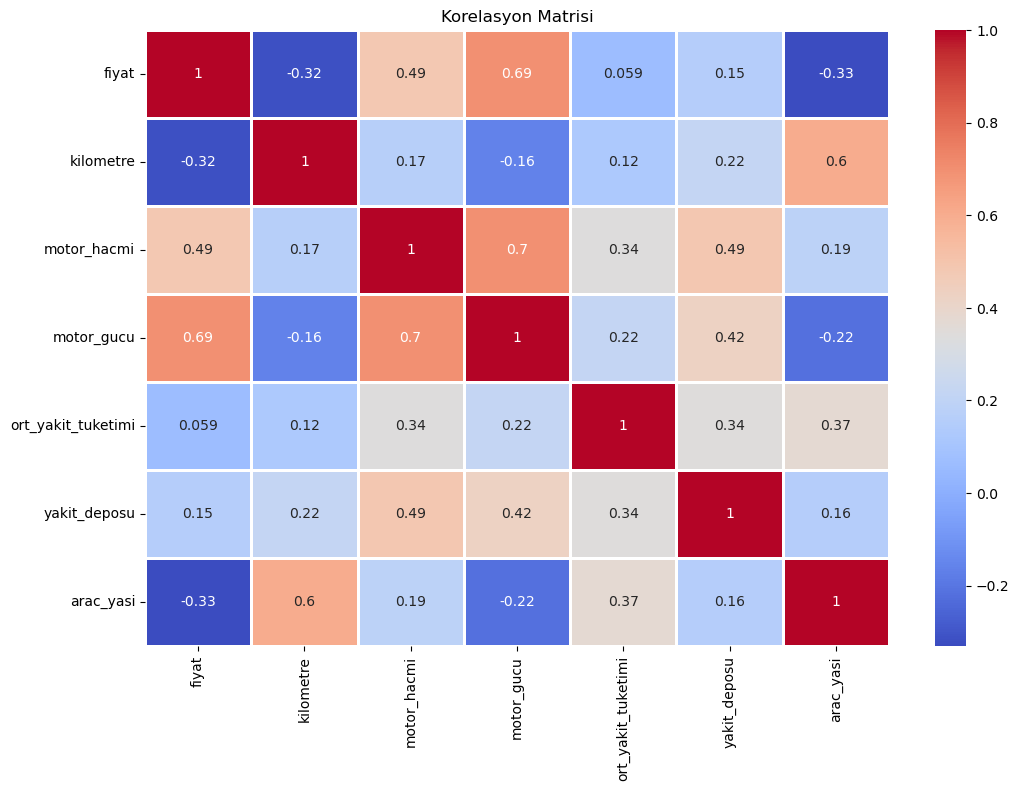

In [150]:
#Eveet koralsyon matirsine de baktigimda birbiri ike korele bir sutun goremiyorum.
#0.80 - 0.90 bir korelayon olsaydi bu kolonalrdan birini atacaktik.
plt.figure(figsize=(12,8))
sns.heatmap(data=df.corr(numeric_only=True), annot=True, linewidths=1, cmap="coolwarm")
plt.title("Korelasyon Matrisi")
plt.show()

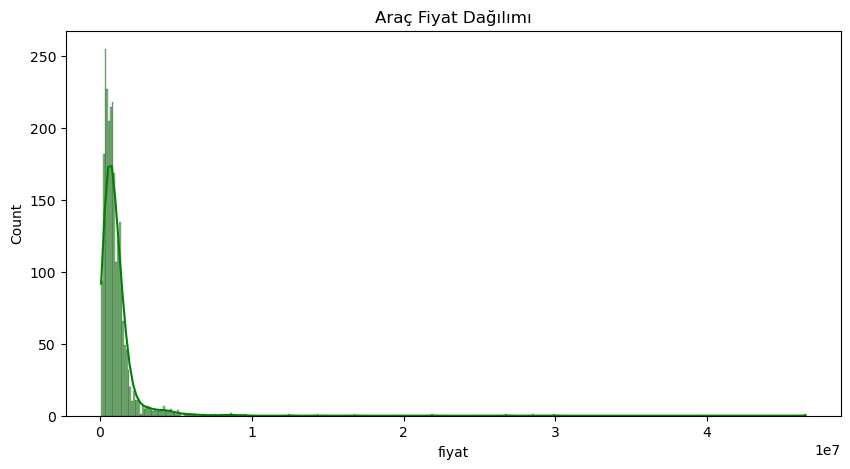

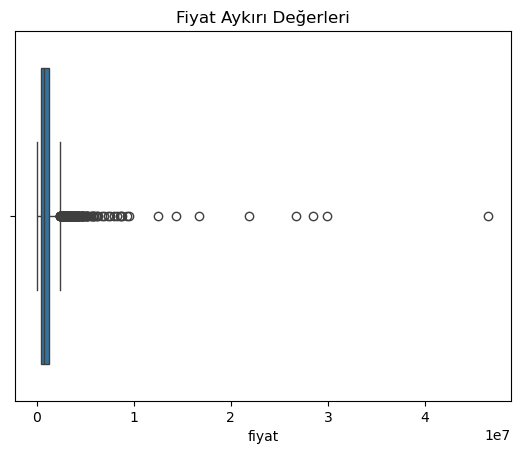

In [151]:
# 1. Fiyat Dağılımı (Histogram)
plt.figure(figsize=(10, 5))
sns.histplot(df['fiyat'], kde=True, color='green')
plt.title('Araç Fiyat Dağılımı')
plt.show()

# 2. Aykırı Değer Kontrolü (Boxplot)
sns.boxplot(x=df['fiyat'])
plt.title('Fiyat Aykırı Değerleri')
plt.show()

#Fiyat kolonumda oldukca aykiri deger oldugunu goruyorum.
#Burada bir aykiri deger kontrolu yapacagim.

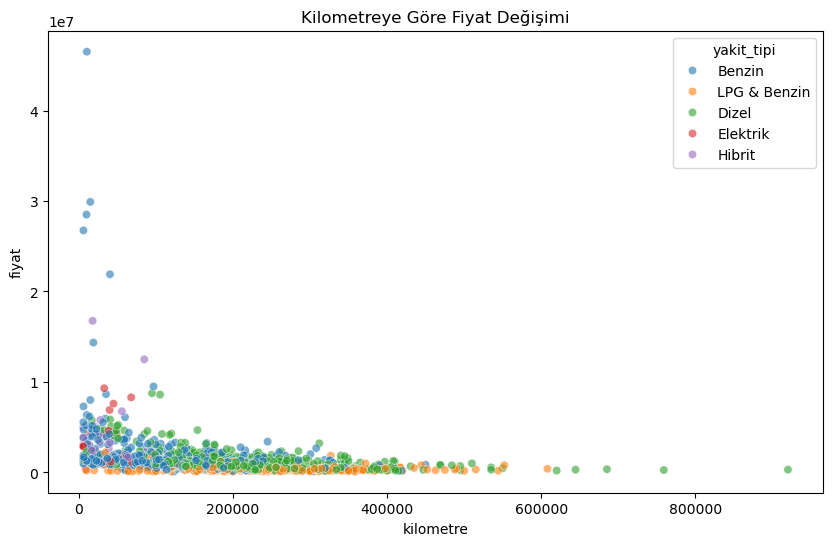

In [152]:
# Kilometre ve Fiyat Arasındaki İlişki (Scatter Plot)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='kilometre', y='fiyat', hue='yakit_tipi', data=df, alpha=0.6)
plt.title('Kilometreye Göre Fiyat Değişimi')
plt.show()

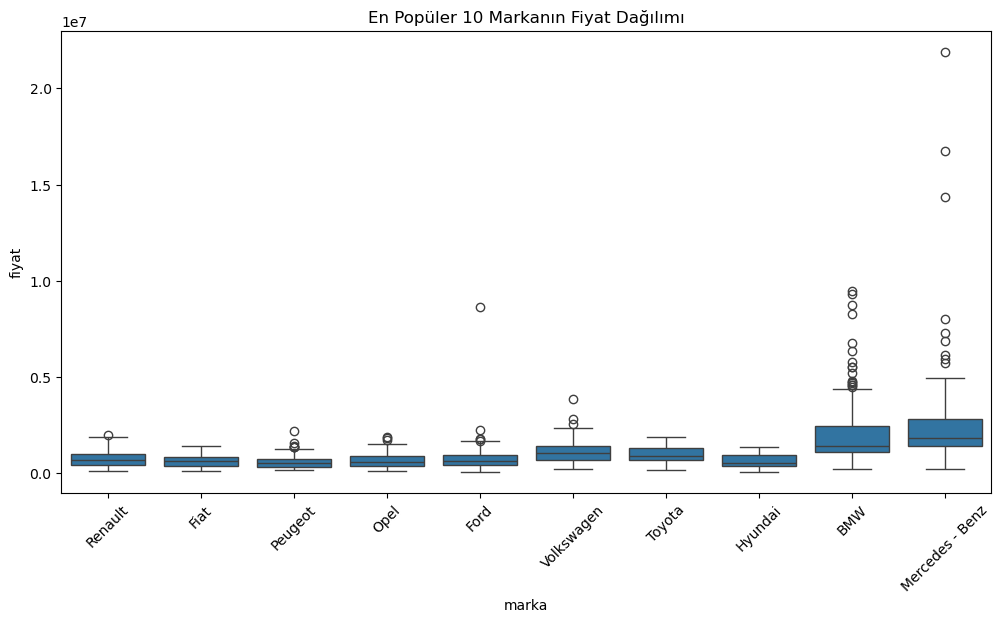

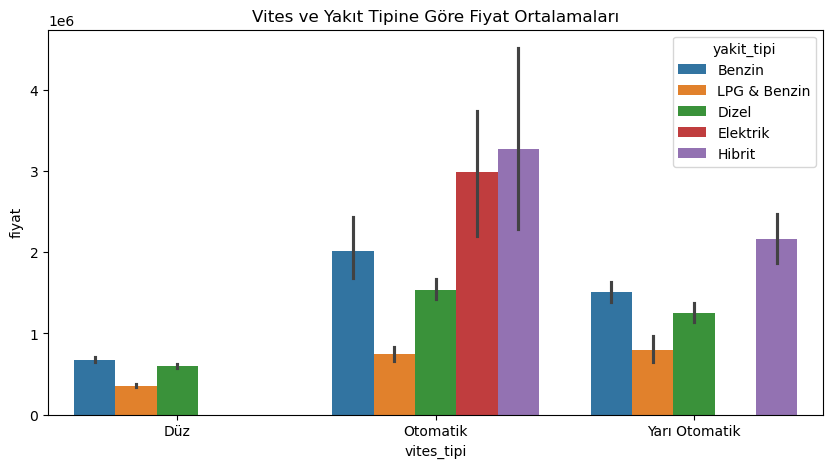

In [153]:
# Markalara Göre Ortalama Fiyat (Barplot)
# Çok fazla marka varsa sadece en çok bulunan ilk 10 markayı alalım
top_10_marka = df['marka'].value_counts().nlargest(10).index

plt.figure(figsize=(12, 6))
sns.boxplot(x='marka', y='fiyat', data=df[df['marka'].isin(top_10_marka)])
plt.title('En Popüler 10 Markanın Fiyat Dağılımı')
plt.xticks(rotation=45)
plt.show()

# Vites ve Yakıt Tipine Göre Fiyat
plt.figure(figsize=(10, 5))
sns.barplot(x='vites_tipi', y='fiyat', hue='yakit_tipi', data=df)
plt.title('Vites ve Yakıt Tipine Göre Fiyat Ortalamaları')
plt.show()

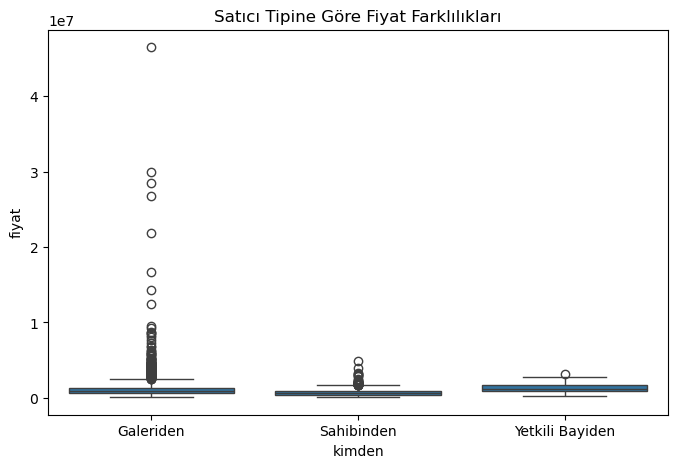

In [154]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='kimden', y='fiyat', data=df)
plt.title('Satıcı Tipine Göre Fiyat Farklılıkları')
plt.show()

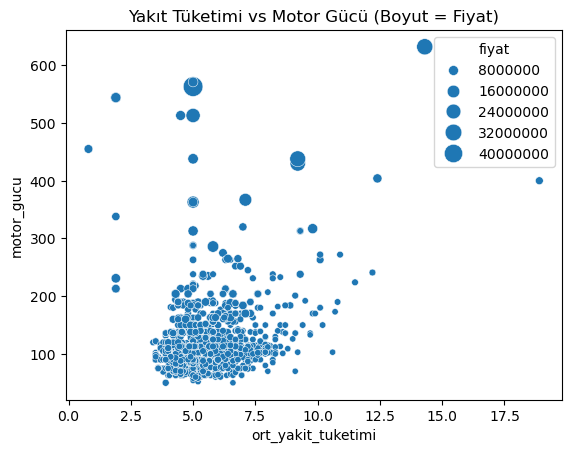

In [155]:
sns.scatterplot(x='ort_yakit_tuketimi', y='motor_gucu', size='fiyat', data=df, sizes=(20, 200))
plt.title('Yakıt Tüketimi vs Motor Gücü (Boyut = Fiyat)')
plt.show()

In [1]:
plt.figure(figsize=(14, 14))

num_cols = df.select_dtypes(include=["int64", "float64"]).columns

for i, col in enumerate(num_cols, 1):
    plt.subplot(len(num_cols)//3 + 1, 3, i)
    
    sns.histplot(df[col], bins=30, kde=True, edgecolor="black") 
    
    plt.title(col)  
    plt.xlabel("") 
    plt.ylabel("")

plt.tight_layout(pad=2)
plt.suptitle("Tüm Sayısal Özelliklerin Histogramları", fontsize=16, y=1.02)
plt.show()

NameError: name 'plt' is not defined

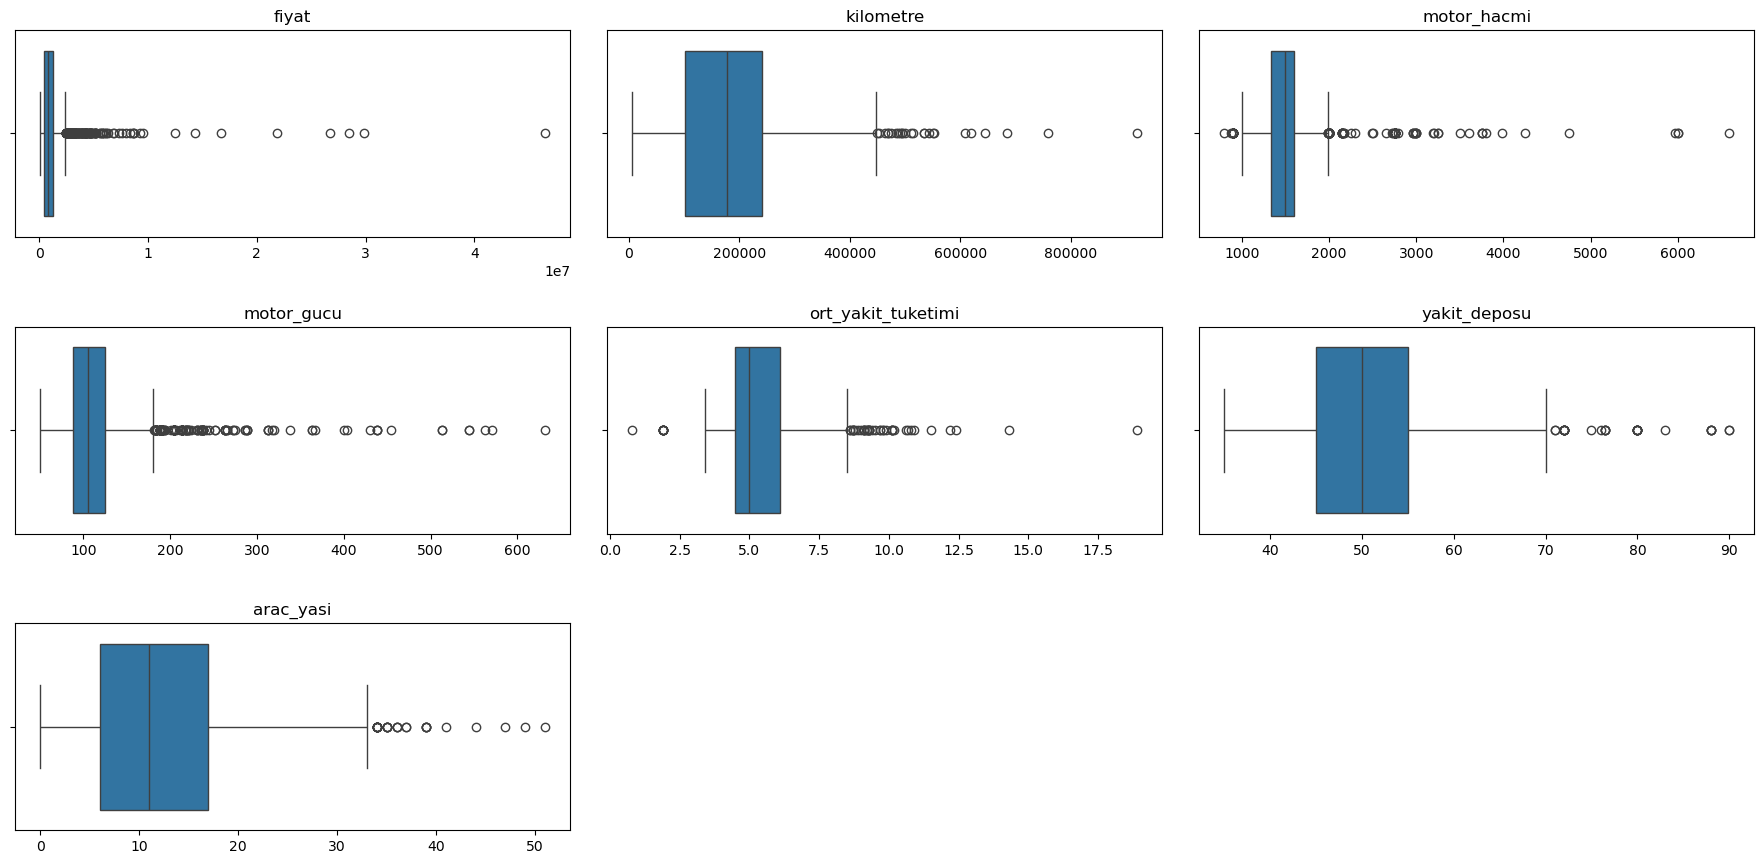

In [157]:
num_cols = df.select_dtypes(include=["int64", "float64"]).columns

rows = (len(num_cols) + 2) // 3  
plt.figure(figsize=(18, rows * 3))

for i, col in enumerate(num_cols, 1):
    plt.subplot(rows, 3, i)
    sns.boxplot(x=df[col])
    plt.title(col)
    plt.xlabel("")

plt.tight_layout(pad=2)
plt.show()

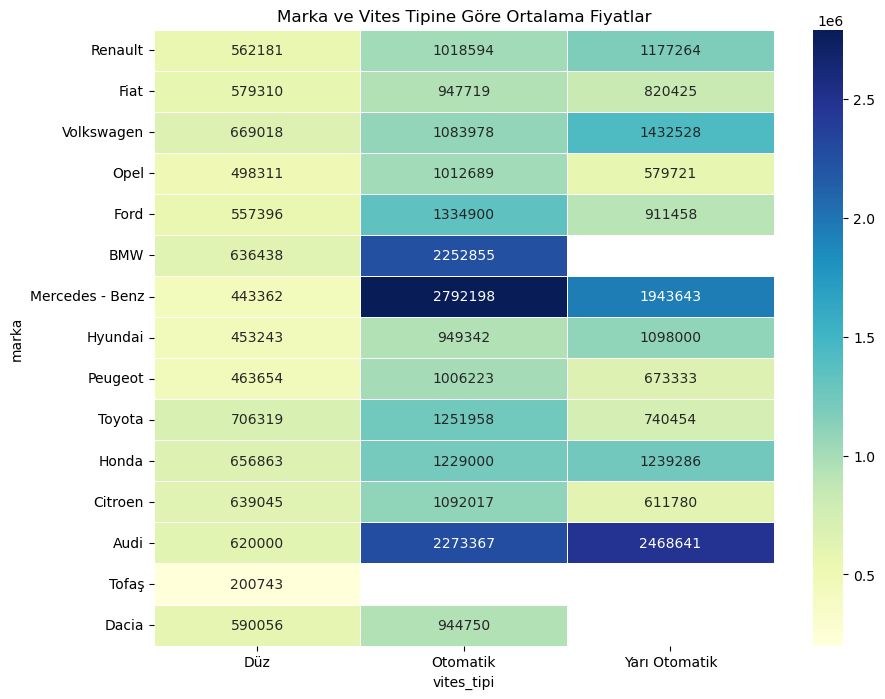

In [158]:
# Pivot tablo oluşturalım: Satırlar Marka, Sütunlar Vites, Değerler Ortalama Fiyat
pivot = df.pivot_table(index='marka', columns='vites_tipi', values='fiyat', aggfunc='mean')

# En çok bulunan 15 markayı alalım (tablo çok uzamasın)
top_brands = df['marka'].value_counts().nlargest(15).index
pivot = pivot.loc[top_brands]

plt.figure(figsize=(10, 8))
sns.heatmap(pivot, annot=True, fmt=".0f", cmap="YlGnBu", linewidths=.5)
plt.title('Marka ve Vites Tipine Göre Ortalama Fiyatlar')
plt.show()

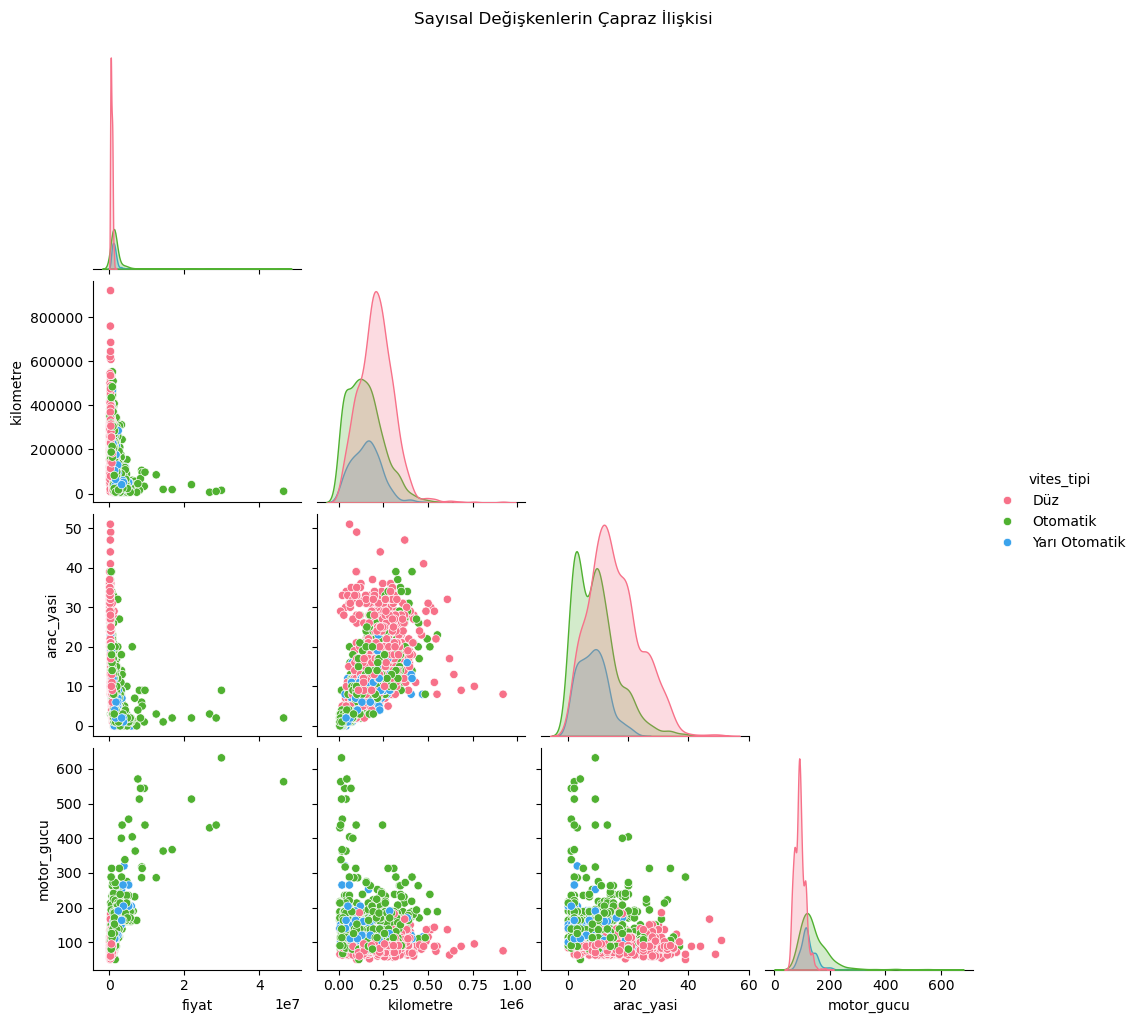

In [159]:
# Sadece sayısal sütunları listelediniz
cols_to_plot = ['fiyat', 'kilometre', 'arac_yasi', 'motor_gucu']
sns.pairplot(df, vars=cols_to_plot, hue='vites_tipi', palette='husl', corner=True)
plt.suptitle("Sayısal Değişkenlerin Çapraz İlişkisi", y=1.02)
plt.show()

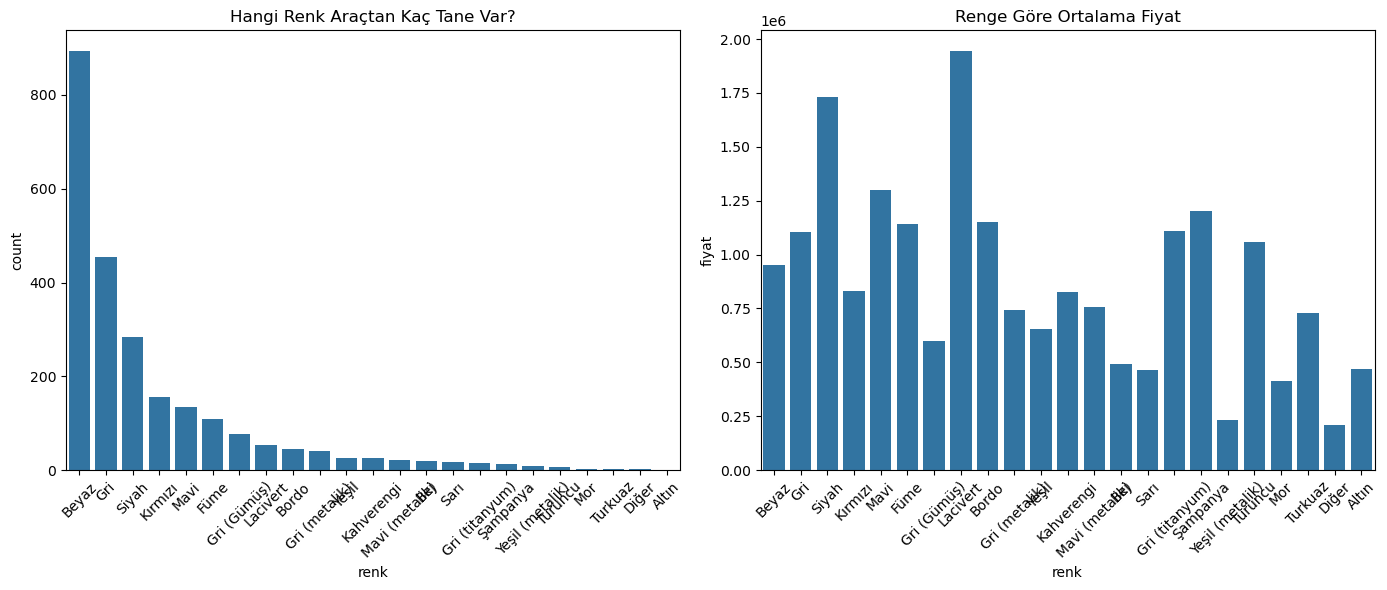

In [160]:
plt.figure(figsize=(14, 6))

# 1. Grafik: Hangi renkten kaç tane var?
plt.subplot(1, 2, 1)
sns.countplot(x='renk', data=df, order=df['renk'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Hangi Renk Araçtan Kaç Tane Var?')

# 2. Grafik: Hangi renk ortalama ne kadar ediyor?
plt.subplot(1, 2, 2)
sns.barplot(x='renk', y='fiyat', data=df, estimator='mean', errorbar=None, order=df['renk'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Renge Göre Ortalama Fiyat')

plt.tight_layout()
plt.show()

# AYKIRI DEGERLERIN ELE ALINMASI

In [161]:
def find_outliers_iqr(df, threshold=1.5):
    numeric_columns = df.select_dtypes(include="number").columns
    outlier_summary = {}

    for column in numeric_columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR

        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

        outlier_summary[column] = {
            "outlier_count": outliers.shape[0],
            "outlier_percentage": 100 * outliers.shape[0] / df.shape[0],
            "upper_bound": upper_bound,
            "lower_bound": lower_bound
        }

    return pd.DataFrame(outlier_summary)

In [162]:
df["fiyat"].describe()

count    2.409000e+03
mean     1.089806e+06
std      1.763376e+06
min      7.500000e+04
25%      4.650000e+05
50%      7.850000e+05
75%      1.245000e+06
max      4.650000e+07
Name: fiyat, dtype: float64

In [163]:
find_outliers_iqr(df, threshold=1.5)

,fiyat,kilometre,motor_hacmi,motor_gucu,ort_yakit_tuketimi,yakit_deposu,arac_yasi
outlier_count,1.400000e+02,25.000000,141.000000,176.000000,50.00000,31.000000,30.00000
outlier_percentage,5.811540e+00,1.037775,5.853051,7.305936,2.07555,1.286841,1.24533
upper_bound,2.415000e+06,449500.000000,1989.500000,180.500000,8.50000,70.000000,33.50000
lower_bound,-7.050000e+05,-106500.000000,937.500000,32.500000,2.10000,30.000000,-10.50000


In [164]:
df.describe(percentiles=[0.15, 0.25, 0.35, 0.50, 0.65, 0.75, 0.85, 0.90, 0.95, 1.0])

,fiyat,kilometre,motor_hacmi,motor_gucu,ort_yakit_tuketimi,yakit_deposu,arac_yasi
count,2.409000e+03,2409.000000,2409.000000,2409.000000,2409.000000,2409.000000,2409.000000
mean,1.089806e+06,179443.097136,1500.523246,114.525944,5.328975,51.630137,12.217103
std,1.763376e+06,100828.515617,361.150112,48.555495,1.264929,7.851097,8.192794
min,7.500000e+04,6001.000000,796.000000,50.000000,0.800000,35.000000,0.000000
15%,3.500000e+05,71000.000000,1248.000000,80.000000,4.100000,45.000000,3.000000
25%,4.650000e+05,102000.000000,1332.000000,88.000000,4.500000,45.000000,6.000000
35%,5.900000e+05,136000.000000,1397.000000,92.000000,4.700000,48.000000,8.000000
50%,7.850000e+05,177000.000000,1498.000000,105.000000,5.000000,50.000000,11.000000
65%,1.010980e+06,214000.000000,1500.500000,115.000000,5.650000,52.000000,14.000000
75%,1.245000e+06,241000.000000,1595.000000,125.000000,6.100000,55.000000,17.000000


In [165]:
# İstatistiksel sınırlar (IQR) lüks araçları veri setinden atmamızı önerse de, 
# modelin üst segmenti kaybetmemesi için sadece aşırı uç değerleri (örn: 20M+ TL) temizledik.
df = df[df['fiyat'] < 20000000]
df = df[df['kilometre'] < 1000000]

In [166]:
find_outliers_iqr(df, threshold=1.5)

,fiyat,kilometre,motor_hacmi,motor_gucu,ort_yakit_tuketimi,yakit_deposu,arac_yasi
outlier_count,1.350000e+02,25.000000,136.000000,171.000000,47.000000,30.00000,30.00000
outlier_percentage,5.615641e+00,1.039933,5.657238,7.113145,1.955075,1.24792,1.24792
upper_bound,2.416875e+06,449723.750000,1989.500000,180.500000,8.518750,70.00000,33.50000
lower_bound,-7.081250e+05,-106634.250000,937.500000,32.500000,2.068750,30.00000,-10.50000


In [167]:
df["fiyat"].max()

16750000

In [168]:
## Simdii aykiri degerleir de ele aldik. Burada iki secenek var.
#Agac tabanli bir algoritma kullanacaksak aykiri degerler ile oynamamiza gerek yok.
#Ama dogrusal model kullanmak istersem burada aykiri degerler icin "Logaritmik Donusum" yapmak en mantikli olacaktir.
#Veya uc degerleri cikaracagiz ama suan icin cok mantikli degil.

In [169]:
#simdi analizleri yaptik gerekli islemleri hallettik. Bundan sonra model kurulumu veri standartlastirma islemleri yapacagiz.

In [170]:
df.shape
#96 adet veri kaybettik.

(2404, 17)

In [171]:
df = df.drop(columns = ["tam_ad", "model"] , axis=1)

In [172]:
#modeli de atacagim. model arac ozelliklerini icerdigi icin burada aracin ozellilerini zaten model sokuyoruz.
#dolayisiyla bunu aticam seri ve modeli birakicam.

# Bagimsiz ve Bagimli Degiskenler

In [173]:
df.head(1)

,fiyat,marka,seri,kilometre,vites_tipi,yakit_tipi,kasa_tipi,renk,motor_hacmi,motor_gucu,cekis,ort_yakit_tuketimi,yakit_deposu,kimden,arac_yasi
0,514950,Seat,Ibiza,177000,Düz,Benzin,Hatchback/5,Beyaz,1390.0,85.0,Önden Çekiş,5.9,45.0,Galeriden,10.0


In [174]:
df.head()

,fiyat,marka,seri,kilometre,vites_tipi,yakit_tipi,kasa_tipi,renk,motor_hacmi,motor_gucu,cekis,ort_yakit_tuketimi,yakit_deposu,kimden,arac_yasi
0,514950,Seat,Ibiza,177000,Düz,Benzin,Hatchback/5,Beyaz,1390.0,85.0,Önden Çekiş,5.9,45.0,Galeriden,10.0
1,280000,Renault,R 19,290000,Düz,LPG & Benzin,Sedan,Beyaz,1500.5,88.0,Önden Çekiş,5.0,55.0,Galeriden,26.0
2,158000,Fiat,Uno,420000,Düz,LPG & Benzin,Hatchback/5,Bordo,1372.0,71.0,Önden Çekiş,5.0,42.0,Galeriden,28.0
3,819000,Dacia,Sandero,130000,Otomatik,Benzin,Hatchback/5,Gri,1200.0,88.0,Önden Çekiş,4.0,50.0,Galeriden,5.0
4,495000,Renault,Clio,227000,Düz,LPG & Benzin,Hatchback/5,Gri,1200.0,63.0,Önden Çekiş,5.0,45.0,Galeriden,13.0


In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2404 entries, 0 to 2499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   fiyat               2404 non-null   int64  
 1   marka               2404 non-null   object 
 2   seri                2404 non-null   object 
 3   kilometre           2404 non-null   int64  
 4   vites_tipi          2404 non-null   object 
 5   yakit_tipi          2404 non-null   object 
 6   kasa_tipi           2404 non-null   object 
 7   renk                2404 non-null   object 
 8   motor_hacmi         2404 non-null   float64
 9   motor_gucu          2404 non-null   float64
 10  cekis               2404 non-null   object 
 11  ort_yakit_tuketimi  2404 non-null   float64
 12  yakit_deposu        2404 non-null   float64
 13  kimden              2404 non-null   object 
 14  arac_yasi           2404 non-null   float64
dtypes: float64(5), int64(2), object(8)
memory usage: 300.5+ KB


In [176]:
df.isnull().sum()

fiyat                 0
marka                 0
seri                  0
kilometre             0
vites_tipi            0
yakit_tipi            0
kasa_tipi             0
renk                  0
motor_hacmi           0
motor_gucu            0
cekis                 0
ort_yakit_tuketimi    0
yakit_deposu          0
kimden                0
arac_yasi             0
dtype: int64

In [177]:
#independet - dependent features
#bagimsiz ve bagimli degisken
X = df.drop(columns=["fiyat"], axis=1)
y = df["fiyat"]

# TRAIN TEST SPLIT

In [178]:
from sklearn.model_selection import train_test_split

In [179]:
#Verilerimizi egitim verisi ve test verisi olarak ayaircagim.
#0.80 egitim (train) - 0.20 test verisi olarak ayirdim.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [180]:
X_train.head()

,marka,seri,kilometre,vites_tipi,yakit_tipi,kasa_tipi,renk,motor_hacmi,motor_gucu,cekis,ort_yakit_tuketimi,yakit_deposu,kimden,arac_yasi
640,Volkswagen,Passat,172000,Yarı Otomatik,Dizel,Sedan,Mavi,1598.0,120.0,Önden Çekiş,4.0,59.0,Galeriden,5.0
1212,Dacia,Sandero,179850,Düz,Dizel,Hatchback/5,Mavi,1500.5,88.0,Önden Çekiş,4.0,50.0,Galeriden,13.0
211,Ford,Focus,103647,Düz,Benzin,Hatchback/5,Mavi,1497.0,123.0,Önden Çekiş,5.8,52.0,Sahibinden,5.0
1941,Mercedes - Benz,E,48500,Otomatik,Dizel,Sedan,Gri,1500.5,163.0,Arkadan İtiş,6.3,59.0,Galeriden,3.0
181,Volkswagen,Jetta,201000,Düz,Benzin,Sedan,Siyah,1197.0,105.0,Önden Çekiş,5.0,55.0,Galeriden,9.0


In [181]:
y_train.head()

640     2200000
1212     725000
211     1040000
1941    4600000
181      955000
Name: fiyat, dtype: int64

### ENCODING
Burada kategork verilerimi encode edecegim.
Asagida kategorik kolonlarimin unique deger sayilari var.
Burada bazilarina OneHotEncoding bazilarina TargetEncoding uygulayacagim.
###### Curse of Dimensionality - Boyutlanma Laneti -- HEPSINE OneHotEncoding yapmayacaagiz.



In [182]:
cat_df = df.select_dtypes(include="object")

In [183]:
cat_df.nunique().sort_values(ascending=False)

seri          214
marka          38
renk           23
kasa_tipi       9
yakit_tipi      5
vites_tipi      3
cekis           3
kimden          3
dtype: int64

In [184]:
# marka ve seri --> unique degerleri cok fazla --> Bundan dolayi "target encoding" yapacagiz.
#renk --> en cok tekrar eden 5 rengi alacagiz. daha sonra digerlerine "diger diyecegiz." One Hot Encoding yapacagiz.
#kasa_tipi, yakit_tipi, vites_tipi, cekis, kimden --> unique deger sayilari cok fazla olmadigi icin OneHoteEncoding yapacagiz.

### Target Encoding - Marka ve Seri Kolonu Icin
- marka ve seri kolonklarina target encoding uygulayacagim.
- markaya gore gruplandirip daha sonra her grubun ortalamasini alip bunu mapleyecegim.
- aynisini seri icin de yapacagim.

In [185]:
#train verimi suanlik bozmmamk ve ortalamalari hesaplamak icin kopyasini aliyorum.
train_enc = X_train.copy()

In [186]:
#hesaplamak icin fiyat kolonumu buraya ekledim.
train_enc["fiyat"] = y_train

In [187]:
marka_ort_map = train_enc.groupby(by="marka")["fiyat"].mean()
seri_ort_map = train_enc.groupby(by="seri")["fiyat"].mean()
genel_ortalama = y_train.mean()

In [188]:
marka_ort_map.head()

marka
Alfa Romeo    6.216667e+05
Anadol        2.500000e+05
Audi          2.168868e+06
BMW           2.147804e+06
Chevrolet     1.003093e+06
Name: fiyat, dtype: float64

In [189]:
seri_ort_map.head()

seri
1 Serisi    1.335557e+06
146         2.050000e+05
190         4.050000e+05
2 Serisi    1.744800e+06
206         3.039286e+05
Name: fiyat, dtype: float64

In [190]:
genel_ortalama

np.float64(1026812.0988039521)

In [191]:
X_train["marka"] = X_train["marka"].map(marka_ort_map)
X_train["seri"] = X_train["seri"].map(seri_ort_map)

In [192]:
X_test["marka"] = X_test["marka"].map(marka_ort_map)
X_test["seri"] = X_test["seri"].map(seri_ort_map)

In [193]:
X_test.isnull().sum()

marka                  5
seri                  15
kilometre              0
vites_tipi             0
yakit_tipi             0
kasa_tipi              0
renk                   0
motor_hacmi            0
motor_gucu             0
cekis                  0
ort_yakit_tuketimi     0
yakit_deposu           0
kimden                 0
arac_yasi              0
dtype: int64

In [194]:
X_test['marka'].fillna(genel_ortalama, inplace=True)
X_test['seri'].fillna(genel_ortalama, inplace=True)

In [195]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1923 entries, 640 to 897
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   marka               1923 non-null   float64
 1   seri                1923 non-null   float64
 2   kilometre           1923 non-null   int64  
 3   vites_tipi          1923 non-null   object 
 4   yakit_tipi          1923 non-null   object 
 5   kasa_tipi           1923 non-null   object 
 6   renk                1923 non-null   object 
 7   motor_hacmi         1923 non-null   float64
 8   motor_gucu          1923 non-null   float64
 9   cekis               1923 non-null   object 
 10  ort_yakit_tuketimi  1923 non-null   float64
 11  yakit_deposu        1923 non-null   float64
 12  kimden              1923 non-null   object 
 13  arac_yasi           1923 non-null   float64
dtypes: float64(7), int64(1), object(6)
memory usage: 225.4+ KB


In [196]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 481 entries, 305 to 907
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   marka               481 non-null    float64
 1   seri                481 non-null    float64
 2   kilometre           481 non-null    int64  
 3   vites_tipi          481 non-null    object 
 4   yakit_tipi          481 non-null    object 
 5   kasa_tipi           481 non-null    object 
 6   renk                481 non-null    object 
 7   motor_hacmi         481 non-null    float64
 8   motor_gucu          481 non-null    float64
 9   cekis               481 non-null    object 
 10  ort_yakit_tuketimi  481 non-null    float64
 11  yakit_deposu        481 non-null    float64
 12  kimden              481 non-null    object 
 13  arac_yasi           481 non-null    float64
dtypes: float64(7), int64(1), object(6)
memory usage: 56.4+ KB


In [197]:
X_train.isnull().sum()

marka                 0
seri                  0
kilometre             0
vites_tipi            0
yakit_tipi            0
kasa_tipi             0
renk                  0
motor_hacmi           0
motor_gucu            0
cekis                 0
ort_yakit_tuketimi    0
yakit_deposu          0
kimden                0
arac_yasi             0
dtype: int64

In [198]:
X_test.isnull().sum()

marka                 0
seri                  0
kilometre             0
vites_tipi            0
yakit_tipi            0
kasa_tipi             0
renk                  0
motor_hacmi           0
motor_gucu            0
cekis                 0
ort_yakit_tuketimi    0
yakit_deposu          0
kimden                0
arac_yasi             0
dtype: int64

# Renk kolonu
Renk kolonunda en cok gecen 5 rengi bulup, digerleirne diger diyecegim. bir sadelestirme islemi yapicam.

In [199]:
X_train["renk"].value_counts()

renk
Beyaz              703
Gri                377
Siyah              227
Kırmızı            118
Mavi               114
Füme                89
Gri (Gümüş)         66
Lacivert            36
Bordo               33
Gri (metalik)       32
Yeşil               22
Mavi (metalik)      20
Kahverengi          18
Bej                 15
Sarı                13
Gri (titanyum)      13
Şampanya            10
Yeşil (metalik)      7
Turuncu              4
Mor                  2
Diğer                2
Turkuaz              1
Altın                1
Name: count, dtype: int64

In [200]:
X_train["renk"].value_counts().sort_values(ascending=False).head(5)

renk
Beyaz      703
Gri        377
Siyah      227
Kırmızı    118
Mavi       114
Name: count, dtype: int64

In [201]:
top_5_renk = X_train['renk'].value_counts().nlargest(5).index

In [202]:
top_5_renk

Index(['Beyaz', 'Gri', 'Siyah', 'Kırmızı', 'Mavi'], dtype='object', name='renk')

In [203]:
#Burada da yukarida soyledigimiz gibi en cok tekrar eden 5 rengi aldik digerlerine diger dedik.
X_train['renk'] = X_train['renk'].apply(lambda x: x if x in top_5_renk else 'Diger')
X_test['renk'] = X_test['renk'].apply(lambda x: x if x in top_5_renk else 'Diger')

In [204]:
X_train["renk"].value_counts()

renk
Beyaz      703
Diger      384
Gri        377
Siyah      227
Kırmızı    118
Mavi       114
Name: count, dtype: int64

## One Hot Encoding

In [205]:
one_hot_cols = ['vites_tipi', 'yakit_tipi', 'kasa_tipi', 'cekis', 'kimden', 'renk']
X_train = pd.get_dummies(X_train, columns=one_hot_cols, drop_first=True)
X_test = pd.get_dummies(X_test, columns=one_hot_cols, drop_first=True)

In [206]:
X_train.isnull().sum()

marka                       0
seri                        0
kilometre                   0
motor_hacmi                 0
motor_gucu                  0
ort_yakit_tuketimi          0
yakit_deposu                0
arac_yasi                   0
vites_tipi_Otomatik         0
vites_tipi_Yarı Otomatik    0
yakit_tipi_Dizel            0
yakit_tipi_Elektrik         0
yakit_tipi_Hibrit           0
yakit_tipi_LPG & Benzin     0
kasa_tipi_Coupe             0
kasa_tipi_Hatchback/3       0
kasa_tipi_Hatchback/5       0
kasa_tipi_MPV               0
kasa_tipi_Pick-up           0
kasa_tipi_SUV               0
kasa_tipi_Sedan             0
kasa_tipi_Station wagon     0
cekis_Arkadan İtiş          0
cekis_Önden Çekiş           0
kimden_Sahibinden           0
kimden_Yetkili Bayiden      0
renk_Diger                  0
renk_Gri                    0
renk_Kırmızı                0
renk_Mavi                   0
renk_Siyah                  0
dtype: int64

In [207]:
X_test.isnull().sum()

marka                       0
seri                        0
kilometre                   0
motor_hacmi                 0
motor_gucu                  0
ort_yakit_tuketimi          0
yakit_deposu                0
arac_yasi                   0
vites_tipi_Otomatik         0
vites_tipi_Yarı Otomatik    0
yakit_tipi_Dizel            0
yakit_tipi_Elektrik         0
yakit_tipi_Hibrit           0
yakit_tipi_LPG & Benzin     0
kasa_tipi_Coupe             0
kasa_tipi_Hatchback/3       0
kasa_tipi_Hatchback/5       0
kasa_tipi_MPV               0
kasa_tipi_SUV               0
kasa_tipi_Sedan             0
kasa_tipi_Station wagon     0
cekis_Arkadan İtiş          0
cekis_Önden Çekiş           0
kimden_Sahibinden           0
kimden_Yetkili Bayiden      0
renk_Diger                  0
renk_Gri                    0
renk_Kırmızı                0
renk_Mavi                   0
renk_Siyah                  0
dtype: int64

In [208]:
X_train.head()

,marka,seri,kilometre,motor_hacmi,motor_gucu,ort_yakit_tuketimi,yakit_deposu,arac_yasi,vites_tipi_Otomatik,vites_tipi_Yarı Otomatik,...,kasa_tipi_Station wagon,cekis_Arkadan İtiş,cekis_Önden Çekiş,kimden_Sahibinden,kimden_Yetkili Bayiden,renk_Diger,renk_Gri,renk_Kırmızı,renk_Mavi,renk_Siyah
640,1.095146e+06,1.469089e+06,172000,1598.0,120.0,4.0,59.0,5.0,False,True,...,False,False,True,False,False,False,False,False,True,False
1212,6.475401e+05,7.623524e+05,179850,1500.5,88.0,4.0,50.0,13.0,False,False,...,False,False,True,False,False,False,False,False,True,False
211,7.650163e+05,9.265331e+05,103647,1497.0,123.0,5.8,52.0,5.0,False,False,...,False,False,True,True,False,False,False,False,True,False
1941,2.529220e+06,2.623890e+06,48500,1500.5,163.0,6.3,59.0,3.0,True,False,...,False,True,False,False,False,False,True,False,False,False
181,1.095146e+06,8.551190e+05,201000,1197.0,105.0,5.0,55.0,9.0,False,False,...,False,False,True,False,False,False,False,False,False,True


In [209]:
X_test.head()

,marka,seri,kilometre,motor_hacmi,motor_gucu,ort_yakit_tuketimi,yakit_deposu,arac_yasi,vites_tipi_Otomatik,vites_tipi_Yarı Otomatik,...,kasa_tipi_Station wagon,cekis_Arkadan İtiş,cekis_Önden Çekiş,kimden_Sahibinden,kimden_Yetkili Bayiden,renk_Diger,renk_Gri,renk_Kırmızı,renk_Mavi,renk_Siyah
305,1.017296e+06,1.207291e+06,170000,1300.5,88.0,5.65,50.0,14.0,False,False,...,False,False,True,False,False,False,True,False,False,False
2328,1.086556e+06,1.090500e+06,149000,1595.0,125.0,6.70,50.0,13.0,True,False,...,False,False,True,True,False,False,False,False,False,False
822,2.147804e+06,1.363820e+06,106330,1500.5,163.0,5.80,60.0,2.0,True,False,...,False,True,False,False,True,False,False,False,False,False
219,6.379933e+05,4.732300e+05,312000,1368.0,77.0,5.90,45.0,14.0,False,True,...,False,False,True,True,False,False,False,False,False,False
554,8.926646e+05,8.156318e+05,48500,999.0,110.0,4.70,40.0,4.0,False,True,...,False,False,True,False,False,False,False,True,False,False


In [210]:
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)
print(f"Eşitlenmiş Test Seti Boyutu: {X_test.shape}")
print(f"Eğitim Seti Boyutu: {X_train.shape}")

Eşitlenmiş Test Seti Boyutu: (481, 31)
Eğitim Seti Boyutu: (1923, 31)


In [211]:
bool_cols = X_train.select_dtypes(include="bool").columns

In [212]:
bool_cols

Index(['vites_tipi_Otomatik', 'vites_tipi_Yarı Otomatik', 'yakit_tipi_Dizel',
       'yakit_tipi_Elektrik', 'yakit_tipi_Hibrit', 'yakit_tipi_LPG & Benzin',
       'kasa_tipi_Coupe', 'kasa_tipi_Hatchback/3', 'kasa_tipi_Hatchback/5',
       'kasa_tipi_MPV', 'kasa_tipi_Pick-up', 'kasa_tipi_SUV',
       'kasa_tipi_Sedan', 'kasa_tipi_Station wagon', 'cekis_Arkadan İtiş',
       'cekis_Önden Çekiş', 'kimden_Sahibinden', 'kimden_Yetkili Bayiden',
       'renk_Diger', 'renk_Gri', 'renk_Kırmızı', 'renk_Mavi', 'renk_Siyah'],
      dtype='object')

In [213]:
X_train[bool_cols] = X_train[bool_cols].astype(int)
X_test[bool_cols] = X_test[bool_cols].astype(int)

In [214]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1923 entries, 640 to 897
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   marka                     1923 non-null   float64
 1   seri                      1923 non-null   float64
 2   kilometre                 1923 non-null   int64  
 3   motor_hacmi               1923 non-null   float64
 4   motor_gucu                1923 non-null   float64
 5   ort_yakit_tuketimi        1923 non-null   float64
 6   yakit_deposu              1923 non-null   float64
 7   arac_yasi                 1923 non-null   float64
 8   vites_tipi_Otomatik       1923 non-null   int64  
 9   vites_tipi_Yarı Otomatik  1923 non-null   int64  
 10  yakit_tipi_Dizel          1923 non-null   int64  
 11  yakit_tipi_Elektrik       1923 non-null   int64  
 12  yakit_tipi_Hibrit         1923 non-null   int64  
 13  yakit_tipi_LPG & Benzin   1923 non-null   int64  
 14  kasa_tipi_Co

In [215]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 481 entries, 305 to 907
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   marka                     481 non-null    float64
 1   seri                      481 non-null    float64
 2   kilometre                 481 non-null    int64  
 3   motor_hacmi               481 non-null    float64
 4   motor_gucu                481 non-null    float64
 5   ort_yakit_tuketimi        481 non-null    float64
 6   yakit_deposu              481 non-null    float64
 7   arac_yasi                 481 non-null    float64
 8   vites_tipi_Otomatik       481 non-null    int64  
 9   vites_tipi_Yarı Otomatik  481 non-null    int64  
 10  yakit_tipi_Dizel          481 non-null    int64  
 11  yakit_tipi_Elektrik       481 non-null    int64  
 12  yakit_tipi_Hibrit         481 non-null    int64  
 13  yakit_tipi_LPG & Benzin   481 non-null    int64  
 14  kasa_tipi_Cou

In [216]:
columns = X_train.columns

In [217]:
columns

Index(['marka', 'seri', 'kilometre', 'motor_hacmi', 'motor_gucu',
       'ort_yakit_tuketimi', 'yakit_deposu', 'arac_yasi',
       'vites_tipi_Otomatik', 'vites_tipi_Yarı Otomatik', 'yakit_tipi_Dizel',
       'yakit_tipi_Elektrik', 'yakit_tipi_Hibrit', 'yakit_tipi_LPG & Benzin',
       'kasa_tipi_Coupe', 'kasa_tipi_Hatchback/3', 'kasa_tipi_Hatchback/5',
       'kasa_tipi_MPV', 'kasa_tipi_Pick-up', 'kasa_tipi_SUV',
       'kasa_tipi_Sedan', 'kasa_tipi_Station wagon', 'cekis_Arkadan İtiş',
       'cekis_Önden Çekiş', 'kimden_Sahibinden', 'kimden_Yetkili Bayiden',
       'renk_Diger', 'renk_Gri', 'renk_Kırmızı', 'renk_Mavi', 'renk_Siyah'],
      dtype='object')

## Scaler - Robust Scaler, Standardization to Dataset
Veri setimizdeki (özellikle fiyat ve kilometre gibi) aykırı değerlerin (outliers) ortalamayı saptırıp modeli yanıltmasını engellemek için, hassas olan Standartlaştırma (StandardScaler) yerine Robust Scaler yöntemini tercih ettik.

Bu sayede uç değerleri silmek zorunda kalmadan, veriyi medyan ve çeyrekler açıklığı (IQR) kullanarak modelin daha iyi öğrenebileceği dirençli bir aralığa getirdik.

In [218]:
from sklearn.preprocessing import RobustScaler

In [219]:
scaler = RobustScaler()

In [220]:
scale_cols = [
    'kilometre', 'motor_hacmi', 'motor_gucu', 'arac_yasi', 
    'ort_yakit_tuketimi', 'yakit_deposu',
    'marka', 'seri' 
]

In [221]:
X_train[scale_cols] = scaler.fit_transform(X_train[scale_cols])
X_test[scale_cols] = scaler.transform(X_test[scale_cols])

In [222]:
import math
def plot_all_histograms(df, title_prefix=""):
    ncols=3
    nrows = math.ceil(len(scale_cols) / ncols)
    plt.figure(figsize=(5 * nrows, 4 * ncols))

    for index, col in enumerate(scale_cols, 1):
        plt.subplot(nrows, ncols, index)
        sns.histplot(data=df[col], bins=30, kde=True)
        plt.xlabel("")
        plt.ylabel("")
        plt.title(f"{title_prefix} {col}")

    plt.tight_layout(pad=3)
    plt.show()

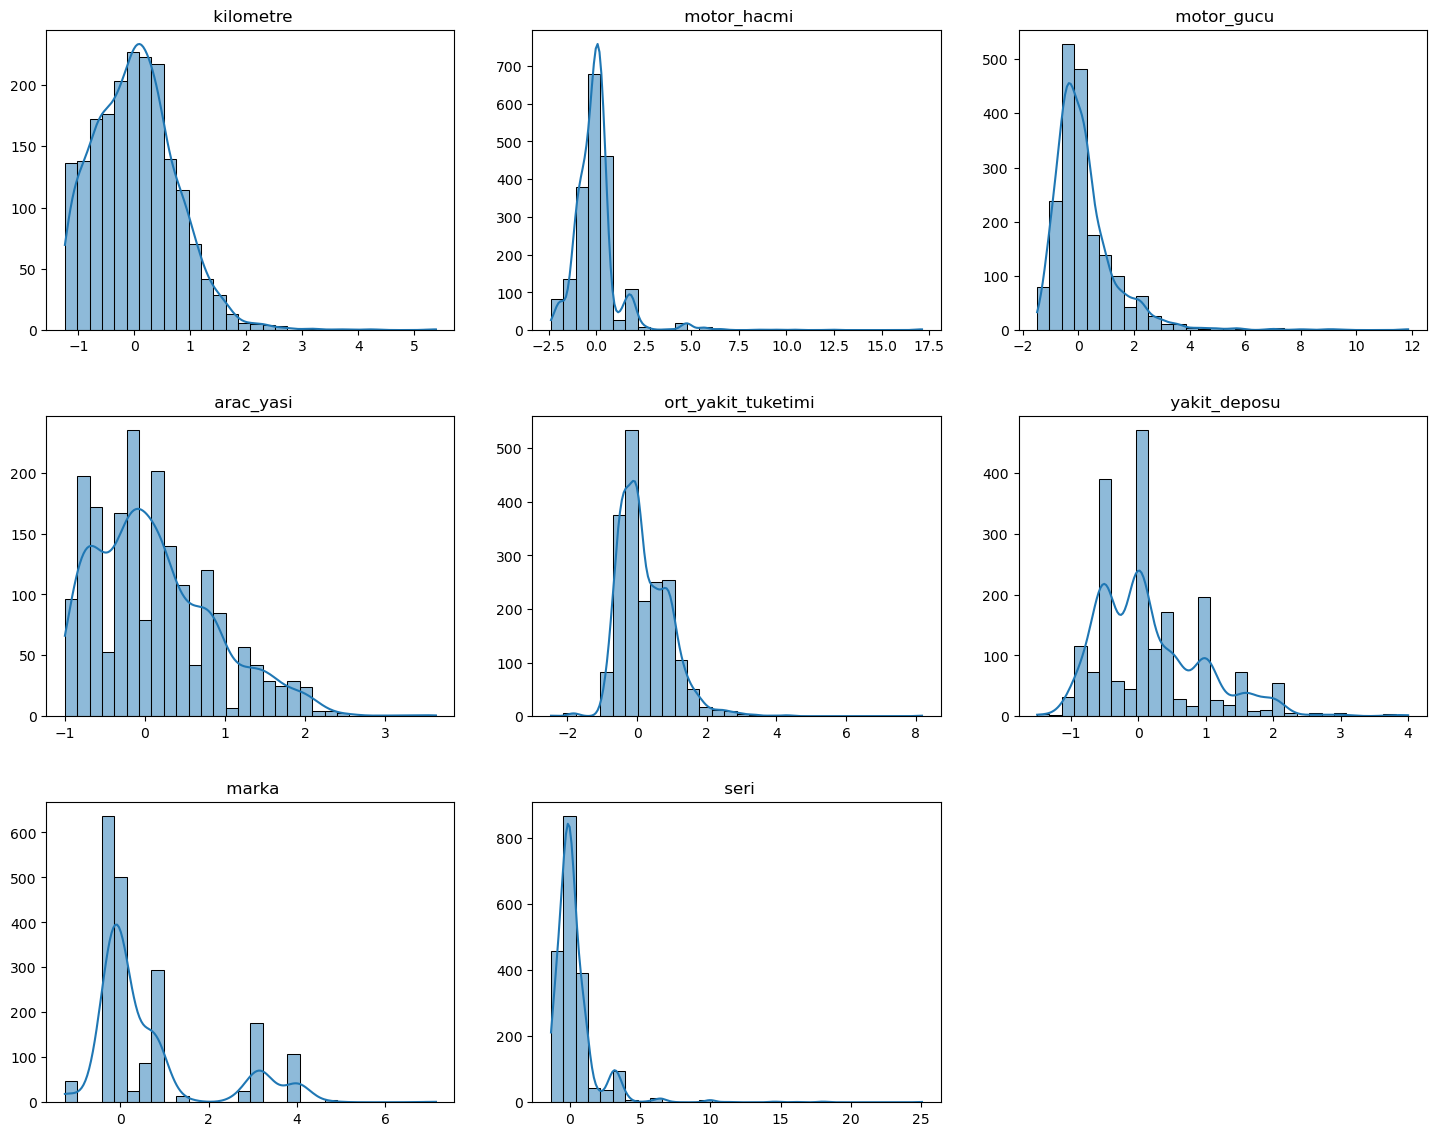

In [223]:
plot_all_histograms(X_train)

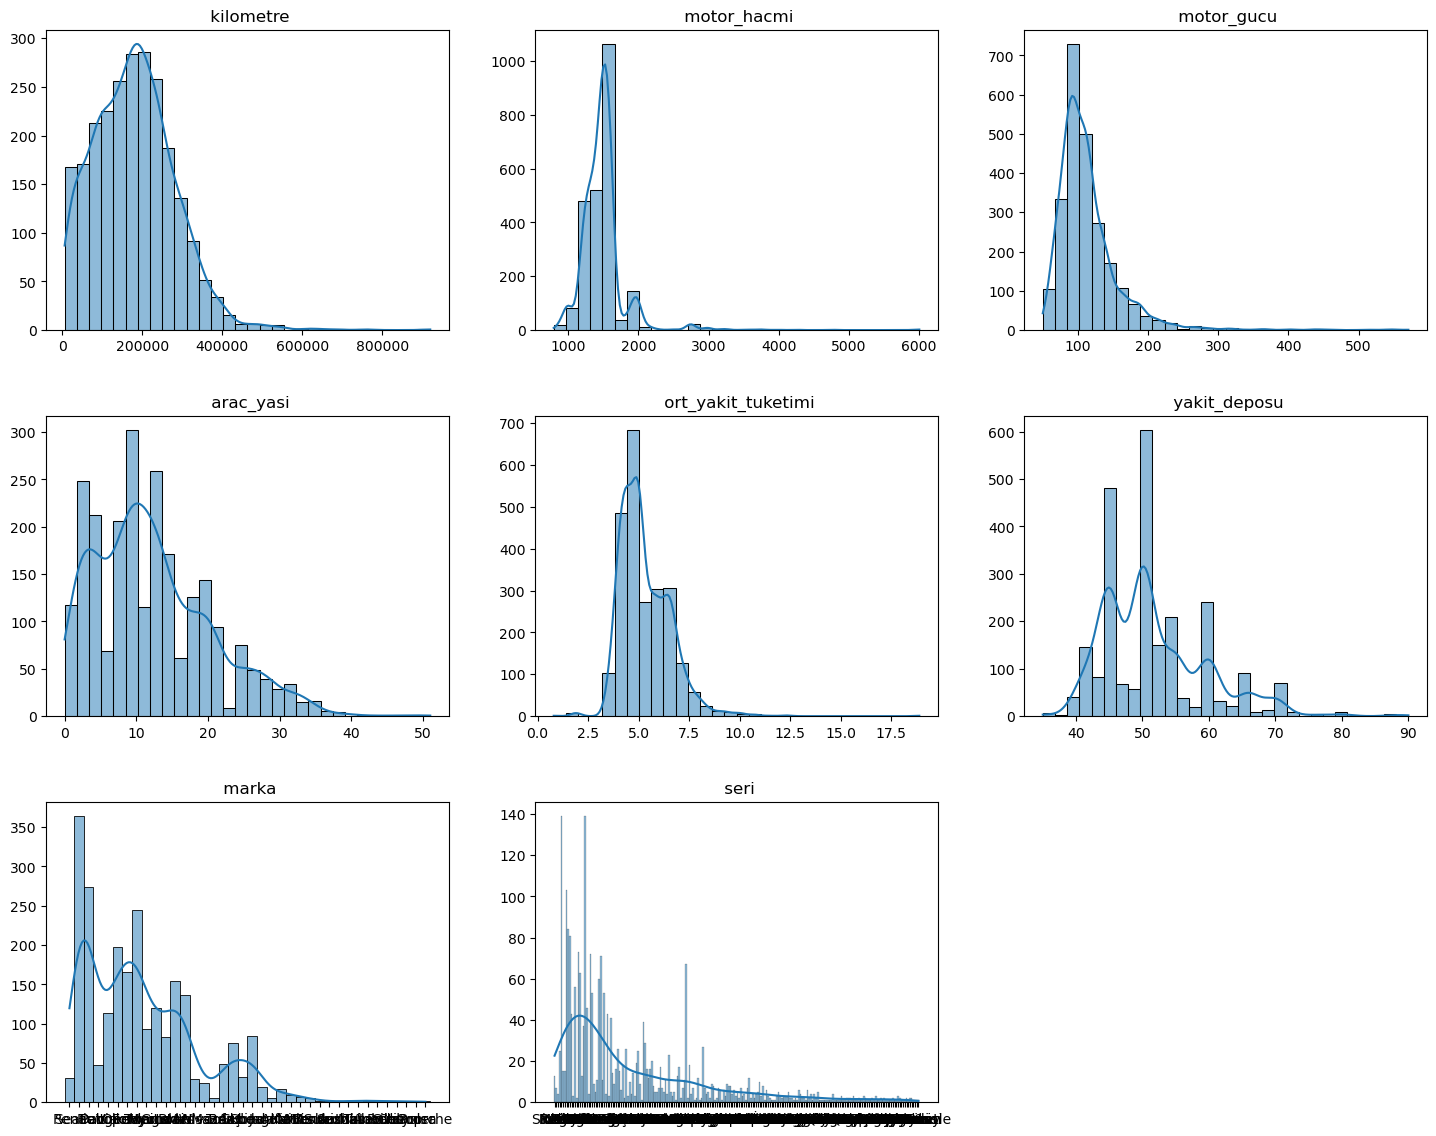

In [224]:
plot_all_histograms(df)

In [225]:
X_train.head()

,marka,seri,kilometre,motor_hacmi,motor_gucu,ort_yakit_tuketimi,yakit_deposu,arac_yasi,vites_tipi_Otomatik,vites_tipi_Yarı Otomatik,...,kasa_tipi_Station wagon,cekis_Arkadan İtiş,cekis_Önden Çekiş,kimden_Sahibinden,kimden_Yetkili Bayiden,renk_Diger,renk_Gri,renk_Kırmızı,renk_Mavi,renk_Siyah
640,0.797221,1.194398,-0.036232,0.380228,0.405405,-0.588235,0.9,-0.545455,0,1,...,0,0,1,0,0,0,0,0,1,0
1212,-0.202779,-0.114649,0.020652,0.009506,-0.459459,-0.588235,0.0,0.181818,0,0,...,0,0,1,0,0,0,0,0,1,0
211,0.059675,0.189453,-0.531543,-0.003802,0.486486,0.470588,0.2,-0.545455,0,0,...,0,0,1,1,0,0,0,0,1,0
1941,4.001094,3.333366,-0.931159,0.009506,1.567568,0.764706,0.9,-0.727273,1,0,...,0,1,0,0,0,0,1,0,0,0
181,0.797221,0.057177,0.173913,-1.144487,0.000000,0.000000,0.5,-0.181818,0,0,...,0,0,1,0,0,0,0,0,0,1


In [226]:
X_test.head()

,marka,seri,kilometre,motor_hacmi,motor_gucu,ort_yakit_tuketimi,yakit_deposu,arac_yasi,vites_tipi_Otomatik,vites_tipi_Yarı Otomatik,...,kasa_tipi_Station wagon,cekis_Arkadan İtiş,cekis_Önden Çekiş,kimden_Sahibinden,kimden_Yetkili Bayiden,renk_Diger,renk_Gri,renk_Kırmızı,renk_Mavi,renk_Siyah
305,0.623294,0.709484,-0.050725,-0.750951,-0.459459,0.382353,0.0,0.272727,0,0,...,0,0,1,0,0,0,1,0,0,0
2328,0.778030,0.493159,-0.202899,0.368821,0.540541,1.000000,0.0,0.181818,1,0,...,0,0,1,1,0,0,0,0,0,0
822,3.148969,0.999414,-0.512101,0.009506,1.567568,0.470588,1.0,-0.818182,1,0,...,0,1,0,0,1,0,0,0,0,0
219,-0.224107,-0.650173,0.978261,-0.494297,-0.756757,0.529412,-0.5,0.272727,0,1,...,0,0,1,1,0,0,0,0,0,0
554,0.344855,-0.015963,-0.931159,-1.897338,0.135135,-0.176471,-1.0,-0.636364,0,1,...,0,0,1,0,0,0,0,1,0,0


In [227]:
X_train.head()

,marka,seri,kilometre,motor_hacmi,motor_gucu,ort_yakit_tuketimi,yakit_deposu,arac_yasi,vites_tipi_Otomatik,vites_tipi_Yarı Otomatik,...,kasa_tipi_Station wagon,cekis_Arkadan İtiş,cekis_Önden Çekiş,kimden_Sahibinden,kimden_Yetkili Bayiden,renk_Diger,renk_Gri,renk_Kırmızı,renk_Mavi,renk_Siyah
640,0.797221,1.194398,-0.036232,0.380228,0.405405,-0.588235,0.9,-0.545455,0,1,...,0,0,1,0,0,0,0,0,1,0
1212,-0.202779,-0.114649,0.020652,0.009506,-0.459459,-0.588235,0.0,0.181818,0,0,...,0,0,1,0,0,0,0,0,1,0
211,0.059675,0.189453,-0.531543,-0.003802,0.486486,0.470588,0.2,-0.545455,0,0,...,0,0,1,1,0,0,0,0,1,0
1941,4.001094,3.333366,-0.931159,0.009506,1.567568,0.764706,0.9,-0.727273,1,0,...,0,1,0,0,0,0,1,0,0,0
181,0.797221,0.057177,0.173913,-1.144487,0.000000,0.000000,0.5,-0.181818,0,0,...,0,0,1,0,0,0,0,0,0,1


## Hedef Degisken icin Log Transform
Hedef degiskende cok fazla uc deger oldugu icin en mantikli yontem log transform donusum olacaktir.

In [228]:
y_train_log = np.log1p(y_train)

In [229]:
y_train_log

640     14.603968
1212    13.493928
211     13.854732
1941    15.341567
181     13.769468
          ...    
1703    13.304687
1142    12.691584
1177    13.392392
1347    14.391563
897     14.169683
Name: fiyat, Length: 1923, dtype: float64

## Model Kurulumu

In [230]:
def evaluate_model(true, predicted):
    mse = mean_squared_error(true, predicted)
    mae = mean_absolute_error(true, predicted)
    rmse = np.sqrt(mean_absolute_error(true, predicted))
    r2_score_ = r2_score(true, predicted)
    return mse, mae, rmse, r2_score_

In [231]:
from catboost import CatBoostRegressor
models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "ElasticNet": ElasticNet(),
    "RandomForestRegressor": RandomForestRegressor(),
    "AdaBoostRegressor": AdaBoostRegressor(),
    "GradientBoostingRegressor": GradientBoostingRegressor(),
    "KNeighborsRegressor": KNeighborsRegressor(),
    "DecisionTreeRegressor": DecisionTreeRegressor(),
    "SVR": SVR(),
    "XGBRegressor": XGBRegressor(),
    "LGBMRegressor": LGBMRegressor(),
    "CatBoostRegressor": CatBoostRegressor(verbose=0) 
}

In [232]:
X_train.head()

,marka,seri,kilometre,motor_hacmi,motor_gucu,ort_yakit_tuketimi,yakit_deposu,arac_yasi,vites_tipi_Otomatik,vites_tipi_Yarı Otomatik,...,kasa_tipi_Station wagon,cekis_Arkadan İtiş,cekis_Önden Çekiş,kimden_Sahibinden,kimden_Yetkili Bayiden,renk_Diger,renk_Gri,renk_Kırmızı,renk_Mavi,renk_Siyah
640,0.797221,1.194398,-0.036232,0.380228,0.405405,-0.588235,0.9,-0.545455,0,1,...,0,0,1,0,0,0,0,0,1,0
1212,-0.202779,-0.114649,0.020652,0.009506,-0.459459,-0.588235,0.0,0.181818,0,0,...,0,0,1,0,0,0,0,0,1,0
211,0.059675,0.189453,-0.531543,-0.003802,0.486486,0.470588,0.2,-0.545455,0,0,...,0,0,1,1,0,0,0,0,1,0
1941,4.001094,3.333366,-0.931159,0.009506,1.567568,0.764706,0.9,-0.727273,1,0,...,0,1,0,0,0,0,1,0,0,0
181,0.797221,0.057177,0.173913,-1.144487,0.000000,0.000000,0.5,-0.181818,0,0,...,0,0,1,0,0,0,0,0,0,1


In [233]:
results_table = []
for name, model in models.items():
    model.fit(X_train, np.log1p(y_train))

    y_pred_train_log = model.predict(X_train)
    y_pred_test_log = model.predict(X_test)

    y_pred_train = np.expm1(y_pred_train_log)
    y_pred_test = np.expm1(y_pred_test_log)

    train_mse = mean_squared_error(y_train, y_pred_train)
    train_mae = mean_absolute_error(y_train, y_pred_train)
    train_rmse = np.sqrt(train_mse)
    train_r2 = r2_score(y_train, y_pred_train)

    test_mse = mean_squared_error(y_test, y_pred_test)
    test_mae = mean_absolute_error(y_test, y_pred_test)
    test_rmse = np.sqrt(test_mse)
    test_r2 = r2_score(y_test, y_pred_test)

    results_table.append([
        name,
        train_mse, train_mae, train_rmse, train_r2,
        test_mse, test_mae, test_rmse, test_r2
    ])

results_df = pd.DataFrame(
    results_table,
    columns=[
        "Model",
        "Train MSE", "Train MAE", "Train RMSE", "Train R2",
        "Test MSE", "Test MAE", "Test RMSE", "Test R2"
    ])

results_df = results_df.sort_values(by="Test RMSE", ascending=True)
results_df

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000327 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 775
[LightGBM] [Info] Number of data points in the train set: 1923, number of used features: 29
[LightGBM] [Info] Start training from score 13.530889


,Model,Train MSE,Train MAE,Train RMSE,Train R2,Test MSE,Test MAE,Test RMSE,Test R2
6,GradientBoostingRegressor,3.425127e+10,103592.147177,1.850710e+05,0.971952,1.183327e+11,146077.766620,343995.252617,0.856009
12,CatBoostRegressor,8.166902e+09,57218.333461,9.037091e+04,0.993312,1.212427e+11,127582.454746,348199.219334,0.852468
0,LinearRegression,4.398007e+11,170211.055645,6.631747e+05,0.639850,1.292626e+11,160867.880099,359531.106644,0.842709
1,Ridge,4.353147e+11,170031.953479,6.597838e+05,0.643523,1.297284e+11,161142.202464,360178.352578,0.842143
11,LGBMRegressor,3.369998e+10,71895.289266,1.835756e+05,0.972403,1.511693e+11,138699.580781,388805.012714,0.816053
10,XGBRegressor,1.471364e+09,24490.779297,3.835836e+04,0.998795,1.922045e+11,151754.984375,438411.323649,0.766120
4,RandomForestRegressor,2.482078e+10,49697.286851,1.575461e+05,0.979674,1.958508e+11,153101.742909,442550.295162,0.761683
9,SVR,1.544352e+11,105507.788252,3.929824e+05,0.873534,2.140929e+11,144987.022482,462701.760666,0.739485
5,AdaBoostRegressor,1.563495e+11,185957.605126,3.954105e+05,0.871966,2.421989e+11,209040.072474,492137.052504,0.705285
7,KNeighborsRegressor,1.929927e+11,149373.839193,4.393093e+05,0.841959,3.464570e+11,209020.202733,588605.994093,0.578421


In [234]:
numeric_cols = [
    "Train MSE", "Train MAE", "Train RMSE", "Train R2",
    "Test MSE", "Test MAE", "Test RMSE", "Test R2"
]

styled_df = (
    results_df.style
    .background_gradient(cmap="Blues", subset=numeric_cols)
    .highlight_min(subset=["Test RMSE"], color="lightgreen")
    .highlight_max(subset=["Test R2"], color="lightgreen")
    .format("{:,.2f}", subset=numeric_cols)  
)

styled_df

,Model,Train MSE,Train MAE,Train RMSE,Train R2,Test MSE,Test MAE,Test RMSE,Test R2
6,GradientBoostingRegressor,"34,251,274,114.32","103,592.15","185,071.00",0.97,"118,332,733,823.16","146,077.77","343,995.25",0.86
12,CatBoostRegressor,"8,166,902,121.22","57,218.33","90,370.91",0.99,"121,242,696,344.91","127,582.45","348,199.22",0.85
0,LinearRegression,"439,800,657,724.72","170,211.06","663,174.68",0.64,"129,262,616,645.01","160,867.88","359,531.11",0.84
1,Ridge,"435,314,700,734.84","170,031.95","659,783.83",0.64,"129,728,445,665.81","161,142.20","360,178.35",0.84
11,LGBMRegressor,"33,699,983,537.58","71,895.29","183,575.55",0.97,"151,169,337,911.59","138,699.58","388,805.01",0.82
10,XGBRegressor,"1,471,364,096.00","24,490.78","38,358.36",1.00,"192,204,488,704.00","151,754.98","438,411.32",0.77
4,RandomForestRegressor,"24,820,777,320.99","49,697.29","157,546.11",0.98,"195,850,763,747.98","153,101.74","442,550.30",0.76
9,SVR,"154,435,165,011.71","105,507.79","392,982.40",0.87,"214,092,919,323.48","144,987.02","462,701.76",0.74
5,AdaBoostRegressor,"156,349,457,102.78","185,957.61","395,410.49",0.87,"242,198,878,447.24","209,040.07","492,137.05",0.71
7,KNeighborsRegressor,"192,992,673,525.06","149,373.84","439,309.31",0.84,"346,457,016,282.60","209,020.20","588,605.99",0.58


In [235]:
param_grids = {
    
    "LGBMRegressor": {
        "model": LGBMRegressor(verbose=-1),
        "params": {
            "num_leaves": [31, 50],
            "learning_rate": [0.01, 0.05, 0.1],
            "n_estimators": [300, 500, 800],
            "colsample_bytree": [0.8, 1.0]
        }
    },
    
   "GradientBoostingRegressor": {
        "model": GradientBoostingRegressor(),
        "params": {
            "n_estimators": [200, 500],
            "learning_rate": [0.01, 0.05, 0.1],
            "max_depth": [3, 5],
            "subsample": [0.8, 1.0]
        }
    },

    "CatBoostRegressor": {
        "model": CatBoostRegressor(verbose=0, allow_writing_files=False),
        "params": {
            "iterations": [300, 500, 800, 1000, 1500, 2000],
            "learning_rate": [0.01, 0.05, 0.1],
            "depth": [4, 6],
            "l2_leaf_reg": [1, 3]
        }
    },

    
    "Ridge": {
        "model": Ridge(),
        "params": {
            "alpha": [0.01, 0.1, 1.0, 10.0, 100.0] # Ceza katsayısı
        }
    },
    

    "LinearRegression": {
        "model": LinearRegression(),
        "params": {} # Linear Regression'da aranacak hiperparametre yoktur, boş bırakılır.
    }
}

In [236]:
tuning_results = []

for model_name, mp in param_grids.items():
    print(f"\nTuning {model_name}...\n")

    search = RandomizedSearchCV(
        estimator=mp["model"],
        param_distributions=mp["params"],
        n_iter=15,
        cv=3,
        scoring="neg_root_mean_squared_error",
        n_jobs=-1,
        verbose=1,
        random_state=42
    )

    search.fit(X_train, y_train_log)

    tuning_results.append([
        model_name,
        search.best_params_,
        search.best_score_
    ])

tuning_df = pd.DataFrame(
    tuning_results,
    columns=["Model", "Best Parameters", "Best CV Score (Neg RMSE)"]
)

tuning_df


Tuning LGBMRegressor...

Fitting 3 folds for each of 15 candidates, totalling 45 fits

Tuning GradientBoostingRegressor...

Fitting 3 folds for each of 15 candidates, totalling 45 fits

Tuning CatBoostRegressor...

Fitting 3 folds for each of 15 candidates, totalling 45 fits

Tuning Ridge...

Fitting 3 folds for each of 5 candidates, totalling 15 fits

Tuning LinearRegression...

Fitting 3 folds for each of 1 candidates, totalling 3 fits


,Model,Best Parameters,Best CV Score (Neg RMSE)
0,LGBMRegressor,"{'num_leaves': 31, 'n_estimators': 800, 'learn...",-0.171825
1,GradientBoostingRegressor,"{'subsample': 0.8, 'n_estimators': 200, 'max_d...",-0.170442
2,CatBoostRegressor,"{'learning_rate': 0.05, 'l2_leaf_reg': 3, 'ite...",-0.162887
3,Ridge,{'alpha': 1.0},-0.202859
4,LinearRegression,{},-0.203575


In [237]:
final_models = {}

for i, row in tuning_df.iterrows():
    model_name = row["Model"]
    best_params = row["Best Parameters"]

    if model_name == "LGBMRegressor":
        final_models[model_name] = LGBMRegressor(**best_params, random_state=42, verbose=-1)
    
    elif model_name == "GradientBoostingRegressor":
        final_models[model_name] = GradientBoostingRegressor(**best_params, random_state=42)
    
    elif model_name == "CatBoostRegressor":
        final_models[model_name] = CatBoostRegressor(**best_params, random_state=42, verbose=0, allow_writing_files=False)
    
    elif model_name == "Ridge":
        final_models[model_name] = Ridge(**best_params, random_state=42)
    
    elif model_name == "LinearRegression":
        final_models[model_name] = LinearRegression(**best_params)

In [238]:
final_results = []

for name, model in final_models.items():
    model.fit(X_train, np.log1p(y_train))

    y_pred_log = model.predict(X_test)

    y_pred = np.expm1(y_pred_log)

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    final_results.append([name, mse, mae, rmse, r2])

final_df = pd.DataFrame(
    final_results,
    columns=["Model", "MSE", "MAE", "RMSE", "R2"]
)

final_df.sort_values(by="RMSE", ascending=True)

,Model,MSE,MAE,RMSE,R2
2,CatBoostRegressor,1.150117e+11,126846.955616,339133.792158,0.860050
1,GradientBoostingRegressor,1.282901e+11,136272.158972,358176.055568,0.843893
4,LinearRegression,1.292626e+11,160867.880099,359531.106644,0.842709
3,Ridge,1.297284e+11,161142.202464,360178.352578,0.842143
0,LGBMRegressor,1.597457e+11,137223.957507,399681.964115,0.805617


In [239]:
def plot_feature_importance(model, feature_names, model_name):
    importance = model.feature_importances_

    fi_df = pd.DataFrame({
        "Feature": feature_names,
        "Importance": importance
    }).sort_values(by="Importance", ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(data=fi_df, x="Importance", y="Feature", palette="viridis")
    plt.title(f"{model_name} - Feature Importance", fontsize=14)
    plt.xlabel("Importance")
    plt.ylabel("Features")
    plt.show()

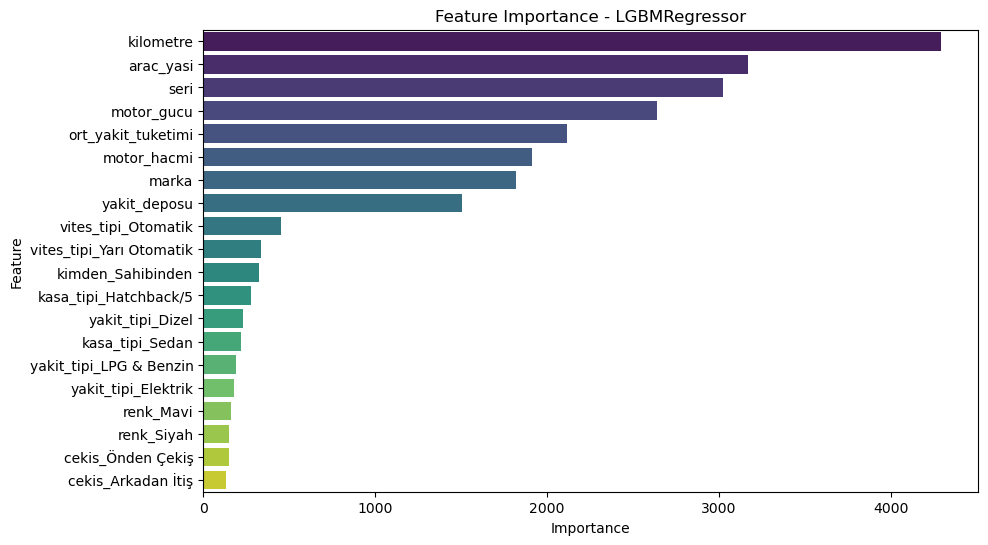

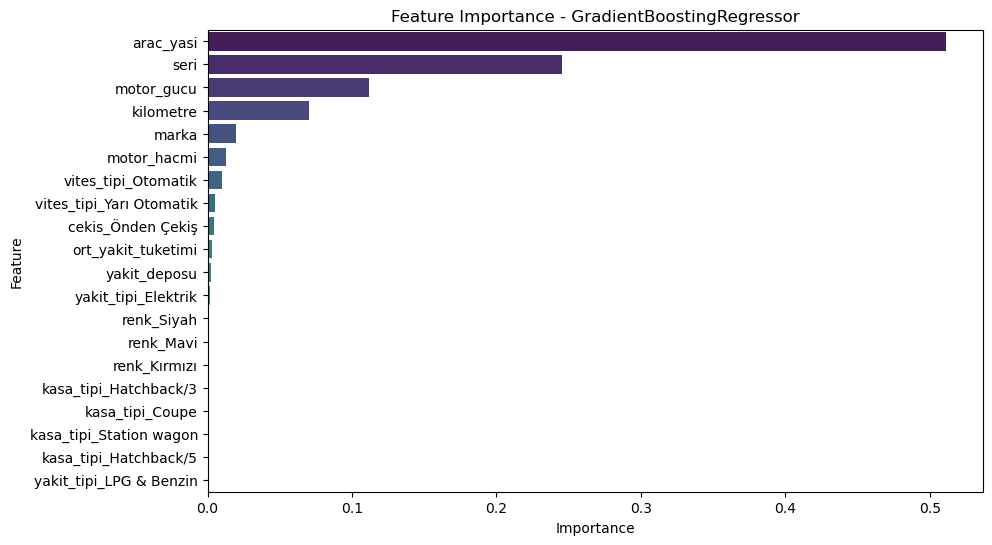

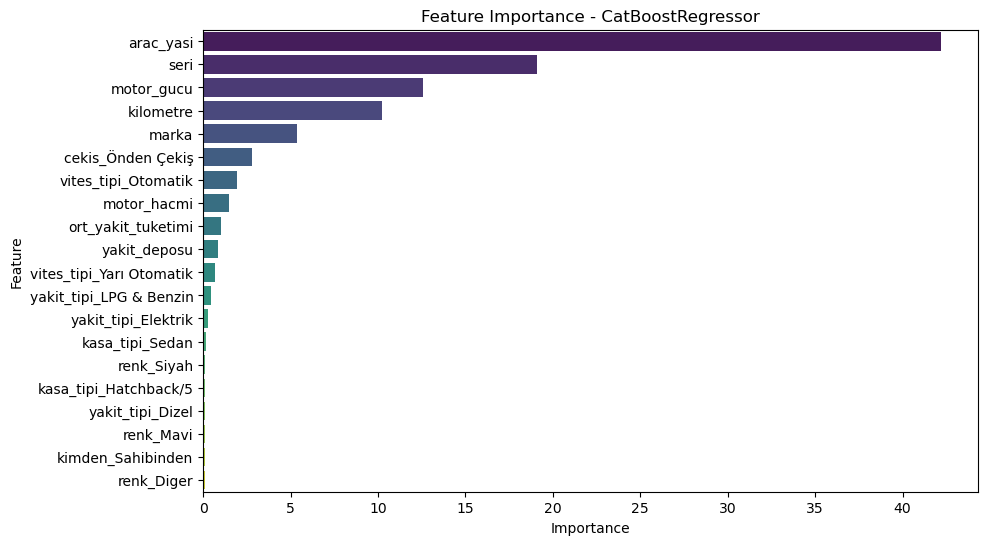

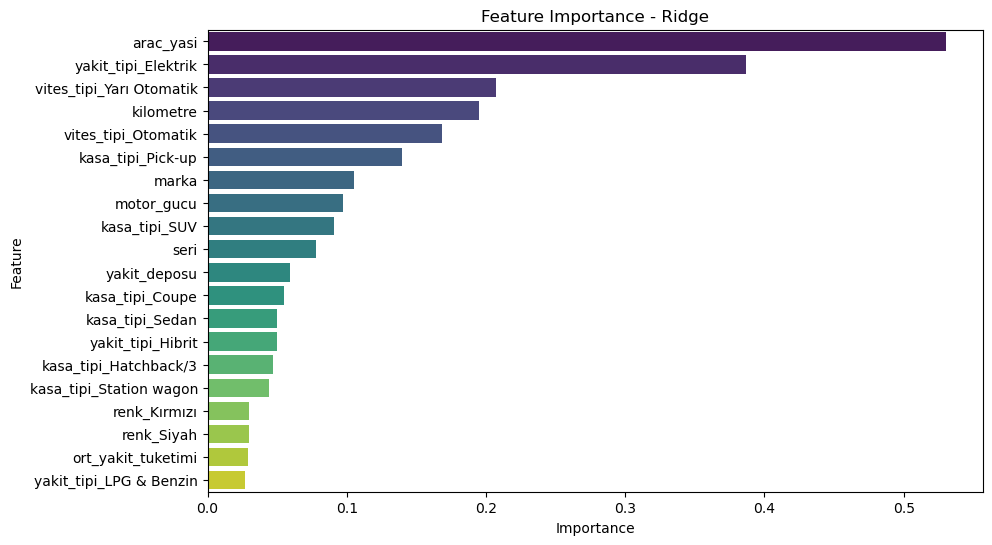

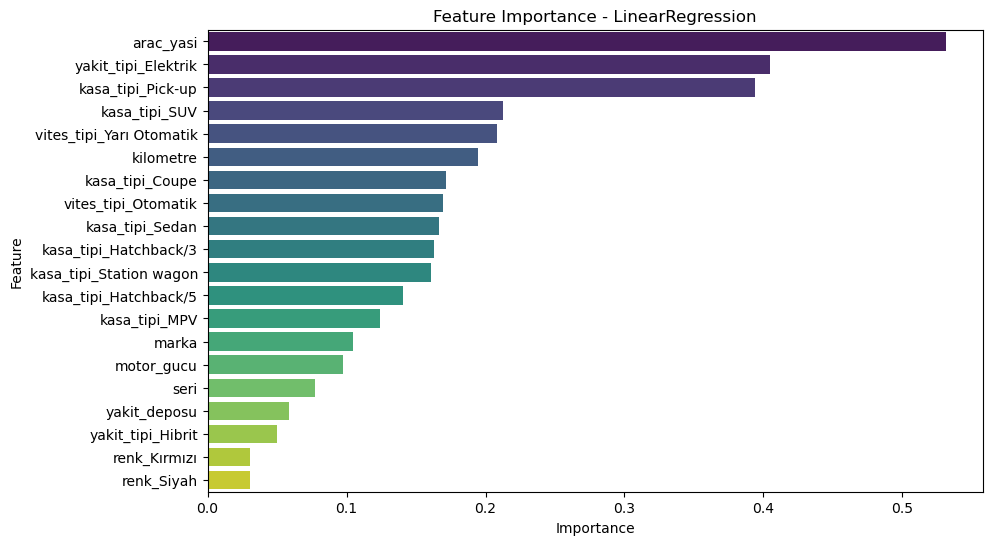

In [240]:
def plot_feature_importance(model, feature_names, model_name):
    
    if hasattr(model, "feature_importances_"):
        importance = model.feature_importances_
    elif hasattr(model, "coef_"):
        importance = np.abs(model.coef_)
    else:
        print(f"{model_name} için önem derecesi hesaplanamadı.")
        return

    fi_df = pd.DataFrame({
        "Feature": feature_names,
        "Importance": importance
    }).sort_values(by="Importance", ascending=False).head(20)

    plt.figure(figsize=(10, 6))
    sns.barplot(x="Importance", y="Feature", data=fi_df, palette="viridis")
    plt.title(f"Feature Importance - {model_name}")
    plt.xlabel("Importance")
    plt.ylabel("Feature")
    plt.show()

for name, model in final_models.items():
    plot_feature_importance(model, X_train.columns, name)

## CatBoost Model

In [241]:
from sklearn.model_selection import GridSearchCV
catboost_params = {
    "iterations": [200, 500, 1000, 1500, 2000],
    "learning_rate": [0.01, 0.05, 0.1],
    "depth": [4, 6, 8, 10],
    "l2_leaf_reg": [1, 3, 5, 9],
    "border_count": [32, 64, 128],
    "bagging_temperature": [0, 1]
}

cat_model = CatBoostRegressor(
    verbose=0,
    allow_writing_files=False,
    random_state=42,
    task_type="CPU"
)

cat_grid = GridSearchCV(
    estimator=cat_model,
    param_grid=catboost_params,
    cv=5,
    n_jobs=-1,
    scoring='neg_mean_squared_error',
    verbose=2
)

cat_grid.fit(X_train, y_train)

print(f"CatBoost En İyi Parametreler: {cat_grid.best_params_}")
print(f"CatBoost En İyi Skor (MSE): {cat_grid.best_score_}")

Fitting 5 folds for each of 1440 candidates, totalling 7200 fits
[CV] END bagging_temperature=0, border_count=32, depth=4, iterations=200, l2_leaf_reg=1, learning_rate=0.01; total time=   0.1s
[CV] END bagging_temperature=0, border_count=32, depth=4, iterations=200, l2_leaf_reg=1, learning_rate=0.1; total time=   0.1s
[CV] END bagging_temperature=0, border_count=32, depth=4, iterations=200, l2_leaf_reg=3, learning_rate=0.05; total time=   0.1s
[CV] END bagging_temperature=0, border_count=32, depth=4, iterations=200, l2_leaf_reg=5, learning_rate=0.1; total time=   0.1s
[CV] END bagging_temperature=0, border_count=32, depth=4, iterations=200, l2_leaf_reg=5, learning_rate=0.1; total time=   0.1s
[CV] END bagging_temperature=0, border_count=32, depth=4, iterations=200, l2_leaf_reg=9, learning_rate=0.1; total time=   0.1s
[CV] END bagging_temperature=0, border_count=32, depth=4, iterations=200, l2_leaf_reg=9, learning_rate=0.1; total time=   0.1s
[CV] END bagging_temperature=0, border_count

In [1]:
model = final_models["CatBoostRegressor"]
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

final_mse = mean_squared_error(y_test, y_pred)
final_rmse = np.sqrt(final_mse)
final_r2 = r2_score(y_test, y_pred)
fnal_mae = mean_absolute_error(y_test, y_pred)

print(f"--- SONUÇLAR ---")
print(f"Cross Validation (Eğitim) Beklentisi (RMSE): 276,120")
print(f"Gerçek Test Hatası (RMSE): {final_rmse:,.0f}")
print(f"Ortalama Mutlak Hata (MAE): {final_mae:,.0f}")
print(f"R2 Skoru (Açıklayıcılık): {final_r2:.4f}")

NameError: name 'final_models' is not defined

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
X = df.drop("fiyat", axis=1)
y = df["fiyat"]

cat_features = [
    'marka', 'seri', 'vites_tipi', 'yakit_tipi', 
    'kasa_tipi', 'renk', 'cekis', 'kimden'
]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

final_catboost = CatBoostRegressor(
    iterations=1000,
    learning_rate=0.1,
    depth=4,
    l2_leaf_reg=1,
    border_count=32,
    bagging_temperature=0,
    random_state=42,
    verbose=0,
    allow_writing_files=False
)

print("Model eğitiliyor...")
final_catboost.fit(X_train, y_train, cat_features=cat_features)

y_pred = final_catboost.predict(X_test)

final_mse = mean_squared_error(y_test, y_pred)
final_rmse = np.sqrt(final_mse)
final_r2 = r2_score(y_test, y_pred)
final_mae = mean_absolute_error(y_test, y_pred)

print("-" * 30)
print(f"Gerçek Test Hatası (RMSE): {final_rmse:,.0f} TL")
print(f"R2 Skoru (Başarı Oranı): %{final_r2 * 100:.2f}")
print(f"Ortalam Mutlak Hata (MAE): {final_mae:,.0f}")
print("-" * 30)

In [ ]:
model_dosya_ismi = "araba_fiyat_tahmin_catboost.cbm"
final_catboost.save_model(model_dosya_ismi)

print(f"Model başarıyla '{model_dosya_ismi}' olarak kaydedildi.")